# Coursera scraping  ⛏️

In [53]:
# import pandas as pd
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.common.exceptions import NoSuchElementException
# import time

# driver = webdriver.Chrome()

# driver.get("https://www.coursera.org/search?query=")

# courses_collected = 0
# target_courses = 10000  
# scroll_pause_time = 0.8  
# scroll_increment = 1500 

# seen_courses = set()
# course_data = []

# while courses_collected < target_courses:
#     cards = driver.find_elements(By.CSS_SELECTOR, "div.cds-ProductCard-gridCard")

#     for card in cards:
#         try:
#             title = card.find_element(By.CSS_SELECTOR, "h3.cds-CommonCard-title").text.strip()
#         except NoSuchElementException:
#             title = ""

#         if title and title in seen_courses:
#             continue

#         try:
#             partner = card.find_element(By.CSS_SELECTOR, "div.cds-ProductCard-partners p.cds-ProductCard-partnerNames").text.strip()
#         except NoSuchElementException:
#             partner = ""

#         try:
#             rating = card.find_element(By.CSS_SELECTOR, "div.cds-RatingStat-sizeLabel span.css-6ecy9b").text.strip()
#         except NoSuchElementException:
#             rating = ""

#         try:
#             reviews = card.find_element(By.CSS_SELECTOR, "div.cds-RatingStat-sizeLabel div.css-vac8rf").text.strip()
#         except NoSuchElementException:
#             reviews = ""

#         try:
#             description = card.find_element(By.CSS_SELECTOR, "div.cds-CommonCard-metadata p.css-vac8rf").text.strip()
#         except NoSuchElementException:
#             description = ""

#         try:
#             course_link = card.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
#         except NoSuchElementException:
#             course_link = ""

#         if title:
#             seen_courses.add(title)
#             course_data.append({
#                 "title": title,
#                 "partner": partner,
#                 "rating": rating,
#                 "reviews": reviews,
#                 "description": description,
#                 "course_link": course_link
#             })
#             courses_collected += 1

#             print(f"Scraped {courses_collected}/{target_courses} courses.", end="\r")

#             if courses_collected >= target_courses:
#                 break

#     driver.execute_script(f"window.scrollBy(0, {scroll_increment});")
#     time.sleep(scroll_pause_time)

# driver.quit()

# df = pd.DataFrame(course_data)

# df.to_csv("coursera_courses.csv", index=False)

# print(f"\nCollected {courses_collected} courses.")
# for idx, course in enumerate(course_data, start=1):
#     print(f"Course {idx}: {course}")


In [54]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup
# import concurrent.futures
# import threading
# import queue
# import time
# import random

# class SafePrint:
#     """Thread-safe printing"""
#     _lock = threading.Lock()

#     @classmethod
#     def print(cls, *args, **kwargs):
#         with cls._lock:
#             print(*args, **kwargs)

# def scrape_course_enrollment(course_data):
#     """
#     Scrape enrollment for a single course with improved performance
    
#     Args:
#         course_data (dict): Dictionary containing course information
    
#     Returns:
#         dict: Updated course data with enrollment information
#     """
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
#         'Accept-Language': 'en-US,en;q=0.9',
#     }

#     try:

#         response = requests.get(
#             course_data['course_link'], 
#             headers=headers, 
#             timeout=10
#         )
#         response.raise_for_status()
        

#         soup = BeautifulSoup(response.text, 'html.parser')
        

#         enrollment_selectors = [
#             'p.css-4s48ix span strong span',
#             'span[data-testid="enrolled-count"]',
#             'span.enrollmentNumber',
#             'div.enrollment-count'
#         ]
        
#         enrollment_element = None
#         for selector in enrollment_selectors:
#             enrollment_element = soup.select_one(selector)
#             if enrollment_element:
#                 break
        
#         if enrollment_element:
#             enrollment = enrollment_element.text.strip()
#             cleaned_enrollment = enrollment.replace(',', '').replace(' already enrolled', '')
            
#             try:
#                 int_enrollment = int(cleaned_enrollment)
#                 course_data['enrollment'] = int_enrollment
#                 SafePrint.print(f"Updated {course_data['title']}: {int_enrollment} enrollments")
#             except ValueError:
#                 SafePrint.print(f"Invalid enrollment format for {course_data['title']}: {enrollment}")
#                 course_data['enrollment'] = None
#         else:
#             SafePrint.print(f"No enrollment found for {course_data['title']}")
#             course_data['enrollment'] = None
        
#         return course_data
    
#     except requests.RequestException as e:
#         SafePrint.print(f"Network error updating {course_data['title']}: {e}")
#         course_data['enrollment'] = None
#         return course_data
#     except Exception as e:
#         SafePrint.print(f"Unexpected error with {course_data['title']}: {e}")
#         course_data['enrollment'] = None
#         return course_data

# def update_coursera_enrollments(input_csv, output_csv=None, max_workers=10):
#     """
#     Update enrollment numbers concurrently
    
#     Args:
#         input_csv (str): Input CSV file path
#         output_csv (str, optional): Output CSV file path
#         max_workers (int, optional): Maximum number of concurrent threads
    
#     Returns:
#         pandas.DataFrame: Updated DataFrame
#     """

#     try:
#         df = pd.read_csv(input_csv)
#     except Exception as e:
#         print(f"Error reading input CSV: {e}")
#         return None

#     courses = df.to_dict('records')

#     with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:

#         updated_courses = list(executor.map(scrape_course_enrollment, courses))

#     updated_df = pd.DataFrame(updated_courses)

#     output_path = output_csv or input_csv
#     updated_df.to_csv(output_path, index=False)
#     print(f"Updated enrollments saved to {output_path}")

#     return updated_df

# if __name__ == "__main__":
#     input_file = 'coursera_courses.csv'
    
#     start_time = time.time()
    
#     updated_df = update_coursera_enrollments(input_file, max_workers=20)
    
#     end_time = time.time()
#     print(f"\nTotal execution time: {end_time - start_time:.2f} seconds")
    
#     if updated_df is not None:
#         print("\nUpdated Dataframe:")
#         print(updated_df)

# udemey scraping 

In [55]:
# import csv
# import time
# import random
# import undetected_chromedriver as uc
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# def setup_driver():
#     """
#     Setup undetected ChromeDriver to bypass anti-bot measures
    
#     Returns:
#         uc.Chrome: Configured undetected Chrome WebDriver
#     """
#     # Configure undetected ChromeDriver options
#     options = uc.ChromeOptions()
    
#     # Additional stealth options
#     options.add_argument("--disable-blink-features=AutomationControlled")
#     options.add_argument("--disable-extensions")
#     options.add_argument("--no-sandbox")
#     options.add_argument("--disable-dev-shm-usage")
    
#     # Randomize user agent
#     user_agents = [
#         "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
#         "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0",
#         "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     ]
#     options.add_argument(f"user-agent={random.choice(user_agents)}")
    
#     # Create undetected driver
#     driver = uc.Chrome(options=options)
    
#     # Additional stealth techniques
#     driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
    
#     return driver

# def scrape_udemy_courses(base_url, max_pages=10):
#     """
#     Scrape Udemy Courses with enhanced anti-detection
    
#     Args:
#         base_url (str): Base URL of the courses page
#         max_pages (int): Maximum number of pages to scrape
    
#     Returns:
#         list: List of dictionaries containing course information
#     """
#     # Setup WebDriver
#     driver = setup_driver()
#     all_courses = []
    
#     try:
#         for page in range(1, max_pages + 1):
#             # Construct full URL with page number
#             url = f"{base_url}?p={page}"
#             print(f"Scraping page {page}: {url}")
            
#             # Navigate to the page with randomized delay
#             driver.get(url)
#             time.sleep(random.uniform(3, 6))  # Random delay to mimic human browsing
            
#             # Wait for course cards with extended timeout
#             try:
#                 WebDriverWait(driver, 15).until(
#                     EC.presence_of_all_elements_located((By.CSS_SELECTOR, '[data-purpose="course-card"]'))
#                 )
#             except Exception as e:
#                 print(f"Timeout waiting for course cards on page {page}: {e}")
#                 # Take screenshot for debugging
#                 driver.save_screenshot(f"page_{page}_error.png")
#                 break
            
#             # Find course cards with multiple selector strategies
#             try:
#                 course_cards = driver.find_elements(By.CSS_SELECTOR, '[data-purpose="course-card"]')
#             except Exception:
#                 try:
#                     course_cards = driver.find_elements(By.CLASS_NAME, 'course-card-module--main-content')
#                 except Exception as e:
#                     print(f"Cannot find course cards: {e}")
#                     break
            
#             # Stop if no courses found
#             if not course_cards:
#                 print(f"No course cards found on page {page}. Stopping scraping.")
#                 break
            
#             # Extract information from each card
#             for card in course_cards:
#                 try:
#                     course_info = {}
                    
#                     # Course Name - Multiple selector strategies
#                     try:
#                         course_name = card.find_element(By.CSS_SELECTOR, 'h3[data-purpose="course-title-url"] a').text
#                     except Exception:
#                         try:
#                             course_name = card.find_element(By.XPATH, ".//h3/a").text
#                         except Exception:
#                             course_name = 'N/A'
#                     course_info['course_name'] = course_name
                    
#                     # Instructors
#                     try:
#                         instructors = card.find_element(By.CSS_SELECTOR, '.instructor-meta').text
#                     except Exception:
#                         instructors = 'N/A'
#                     course_info['instructors'] = instructors
                    
#                     # Price
#                     try:
#                         price = card.find_element(By.CSS_SELECTOR, '.price-text-module--price-part').text
#                     except Exception:
#                         price = 'N/A'
#                     course_info['price'] = price
                    
#                     # Rating
#                     try:
#                         rating = card.find_element(By.CSS_SELECTOR, '.star-rating-module--rating-number').text
#                     except Exception:
#                         rating = 'N/A'
#                     course_info['rating'] = rating
                    
#                     # Course URL
#                     try:
#                         course_url = card.find_element(By.CSS_SELECTOR, 'h3[data-purpose="course-title-url"] a').get_attribute('href')
#                     except Exception:
#                         course_url = 'N/A'
#                     course_info['course_url'] = course_url
                    
#                     all_courses.append(course_info)
                
#                 except Exception as e:
#                     print(f"Error processing a course card: {e}")
            
#             # Random delay between pages
#             time.sleep(random.uniform(2, 5))
    
#     except Exception as e:
#         print(f"General scraping error: {e}")
#         # Take full page screenshot for debugging
#         driver.save_screenshot("scraping_error.png")
    
#     finally:
#         # Always close the driver
#         driver.quit()
    
#     return all_courses

# def save_to_csv(courses, filename='udemy_courses.csv'):
#     """
#     Save scraped courses to a CSV file
    
#     Args:
#         courses (list): List of course dictionaries
#         filename (str): Output CSV filename
#     """
#     if not courses:
#         print("No courses to save.")
#         return
    
#     # Use keys of first course as fieldnames
#     fieldnames = courses[0].keys()
    
#     with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
#         writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#         writer.writeheader()
#         writer.writerows(courses)
    
#     print(f"Courses saved to {filename}")
#     print(f"Total courses scraped: {len(courses)}")

# def main():
#     # Udemy courses URL (adjust based on your specific needs)
#     base_url = "https://www.udemy.com/courses/development/"
    
#     # Set the maximum number of pages to scrape
#     max_pages = 5
    
#     # Scrape courses
#     courses = scrape_udemy_courses(base_url, max_pages)
    
#     # Save to CSV
#     save_to_csv(courses)

# if __name__ == "__main__":
#     main()

In [56]:
!pip install textblob
import numpy as np     
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score ,RandomizedSearchCV ,KFold
from sklearn.tree import DecisionTreeClassifier ,plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler , LabelEncoder ,MinMaxScaler,PolynomialFeatures ,MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, HuberRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import accuracy_score  ,mean_squared_error  ,  confusion_matrix  ,  r2_score ,classification_report, roc_curve, auc ,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor , GradientBoostingClassifier
from sklearn.svm import SVC ,LinearSVC,SVR
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

In [ ]:
from pymongo import MongoClient
from pprint import pprint

client = MongoClient()
db=client.test

In [ ]:
import csv

collection = db.my_collectioncom  
csv_file_path = "C:\\Users\\DELL\\Downloads\\Comments.csv\\Comments.csv" 

with open(csv_file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file) 
    datacom = list(reader)  

collection.insert_many(datacom)

print("Data inserted successfully!")

In [ ]:
import csv

collection = db.my_collectioncourse2  

csv_file_path = "C:\\Users\\DELL\\Downloads\\Course_info.csv\\Course_info.csv"

with open(csv_file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)  
    datacourse = list(reader)  

collection.insert_many(datacourse)
print("Data inserted successfully!")

# Course Dataset - EDA


In [57]:
dcom=pd.read_csv("Course_info.csv")
dcour=pd.read_csv("Comments.csv")

In [58]:
dcom

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209729,4913954.0,Let's Speak Urdu - The Urdu Grammar,True,19.99,Urdu - Become fluent in this beautiful South A...,3.0,0.00,0.0,0.0,5.0,54.0,2022-10-05T11:31:36Z,2022-10-06,Teaching & Academics,Language Learning,Urdu Language,English,/course/lets-speak-urdu-the-grammar/,Jawaid Hameed,/user/jawaid-hameed/
209730,4914146.0,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T12:29:23Z,2022-10-05,IT & Software,IT Certifications,CompTIA Linux+,English,/course/comptia-linux-xko-004005-2-practice-ex...,Jean-François d'Halluin,/user/badre-lini/
209731,4914002.0,CISSP 4 full exams #1 : All CISSP domains - 12...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T11:04:05Z,2022-10-05,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,English,/course/cissp-4-full-exams-1-all-cissp-domains...,Jean-François d'Halluin,/user/badre-lini/
209732,4913934.0,JD Edwards EnterpriseOne Fixed Assets Accounti...,True,119.99,Full-length course (Part-3 of 3) on JD Edwards...,0.0,0.00,0.0,0.0,9.0,82.0,2022-10-05T10:30:19Z,2022-10-05,Finance & Accounting,Other Finance & Accounting,Financial Accounting,English,/course/jde-fixed-assets-accounting-part-3/,Niranjan Bhatia,/user/systemic-software-solutions/


In [59]:
dcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209703 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [60]:
dcom.keys()

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [61]:
dcom.nunique().sort_values(ascending=False).to_frame().T


,id,course_url,published_time,title,headline,instructor_url,instructor_name,num_subscribers,avg_rating,num_reviews,topic,last_update_date,content_length_min,num_comments,num_lectures,price,subcategory,language,category,is_paid
0,209734,209734,209562,208257,202743,73514,72731,20385,7326,4937,3818,3532,3446,1946,698,236,130,79,13,2


In [62]:
dcom.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               31
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [63]:
print(dcom.shape)

display(dcom.describe().round(2))

(209734, 20)


,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,209734.00,209734.00,209734.00,209734.00,209734.00,209734.00,209734.00,209734.00
mean,3015403.09,81.67,3096.99,3.75,244.36,44.87,36.55,265.56
std,1342558.02,117.32,15581.32,1.53,2458.10,355.77,51.87,454.45
min,1769.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1950733.50,19.99,26.00,3.80,3.00,1.00,11.00,69.00
50%,3292863.00,34.99,206.00,4.33,17.00,5.00,22.00,133.00
75%,4189458.50,99.99,1435.00,4.62,74.00,18.00,42.00,289.00
max,4914146.00,999.99,1752364.00,5.00,436457.00,39040.00,1095.00,22570.00


## Price distribution

C:\Users\Laser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribution of Udemy course prices.')

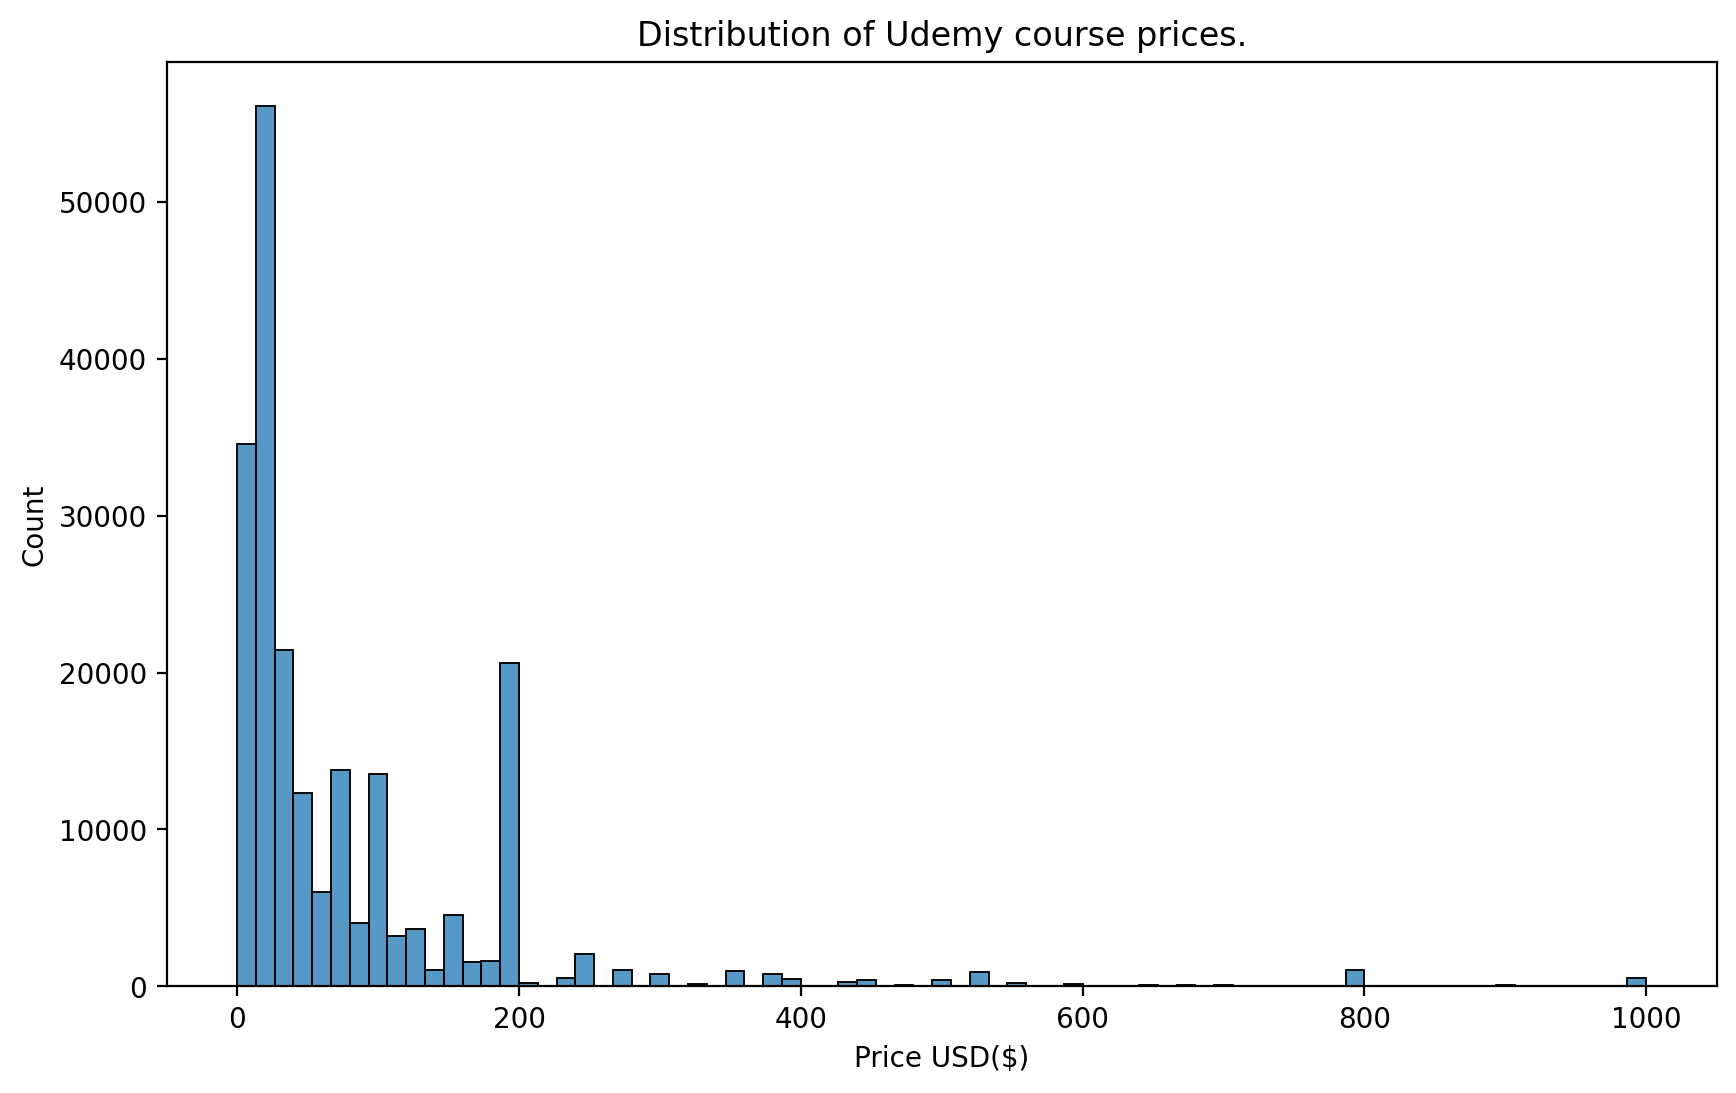

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6), dpi=200)
sns.histplot(data=dcom, x='price', bins=75)
plt.xlabel("Price USD($)")
plt.title("Distribution of Udemy course prices.")

<Axes: xlabel='price', ylabel='category'>

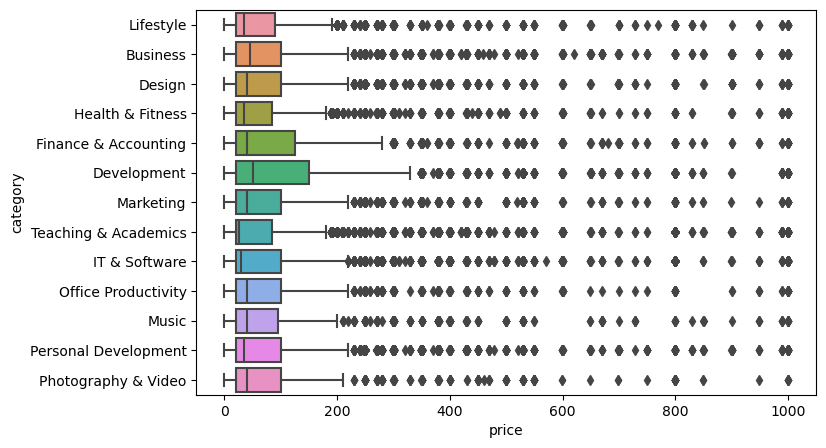

In [65]:
plt.figure(figsize=(8,5), dpi=100)
sns.boxplot(data=dcom, x='price', y='category')

## Udemy Courses Price and Category-Wise Distribution

### Price Distribution
# The majority of Udemy courses are priced between $0 and $200. Among the courses:

- **Free Courses**: 21,738 courses (approximately 10% of total courses).
- **Paid Courses**: 187,996 courses (approximately 89.64% of total courses).

For paid courses:
- Nearly **20%** of the courses are sold at **$19.99**.
- About **8.34%** of the courses are sold at **$199.99**.

### Visualizations

#### Share of Free and Paid Courses
The count plot below visualizes the distribution of free and paid courses, showing a significant majority of courses are in the paid category.

#### Category-Wise Price Distribution
The boxplot displays the price distribution of courses across different categories, providing insights into pricing trends and variations for each category.

C:\Users\Laser\AppData\Local\Temp\ipykernel_9524\1497922732.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



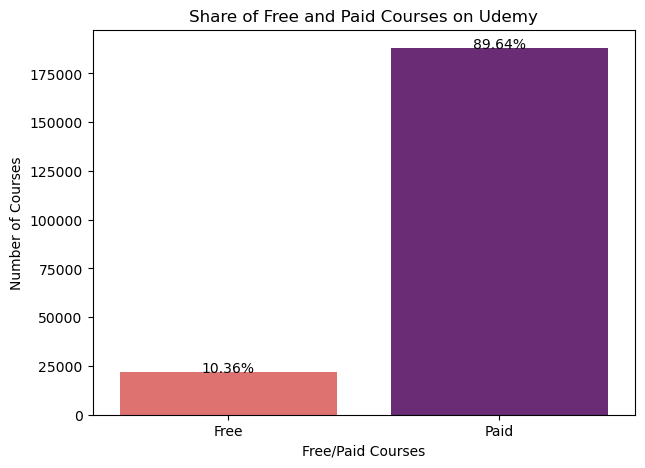

In [66]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax = sns.countplot(data=dcom, x='is_paid', palette='magma_r', order=[False, True])  # Explicit order

ax.set_xticklabels(labels=['Free', 'Paid'])
ax.set_xlabel("Free/Paid Courses")
ax.set_ylabel("Number of Courses")
ax.set_title("Share of Free and Paid Courses on Udemy")

percentage = round(dcom['is_paid'].value_counts(normalize=True).sort_index() * 100, 2)

patches = ax.patches
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() + 0.05
    ax.annotate(f'{percentage[i]:.2f}%', (x, y), ha='center')

plt.show()


Text(0.5, 0, 'price')

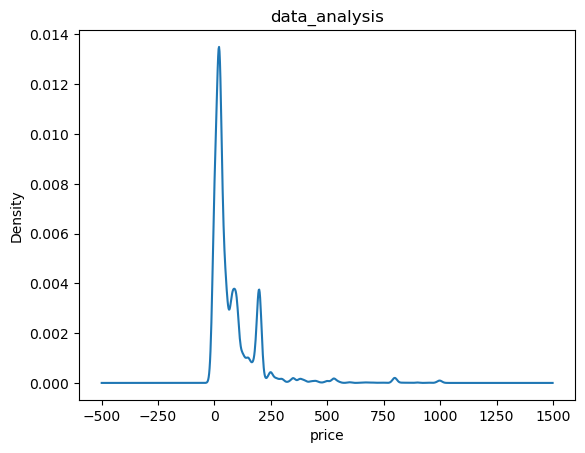

In [108]:
ax = dcom['price'].plot(kind= 'kde' , title = 'data_analysis')
ax.set_xlabel('price')

## Course Rating in Udemy

In [67]:
dcom['avg_rating'] = dcom['avg_rating'].astype('int')
dcom['avg_rating'].dtypes
dcom['num_reviews'] = dcom['num_reviews'].astype('int')
dcom['price'] = dcom['price'].astype('int')
dcom[' num_comments'] = dcom['num_comments'].astype('int')
dcom['content_length_min'] = dcom['content_length_min'].astype('int')


In [68]:
dcom['num_subscribers'] = dcom['num_subscribers'].astype('int')
dcom['num_lectures'] = dcom['num_lectures'].astype('int')
dcom['num_comments']=dcom['num_comments'].astype('int')
dcom[['price','avg_rating','num_reviews','num_comments']].describe()

,price,avg_rating,num_reviews,num_comments
count,209734.000000,209734.000000,209734.000000,209734.000000
mean,80.878270,3.351974,244.358812,44.874589
std,117.282674,1.406051,2458.098276,355.773107
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,3.000000,1.000000
50%,34.000000,4.000000,17.000000,5.000000
75%,99.000000,4.000000,74.000000,18.000000
max,999.000000,5.000000,436457.000000,39040.000000


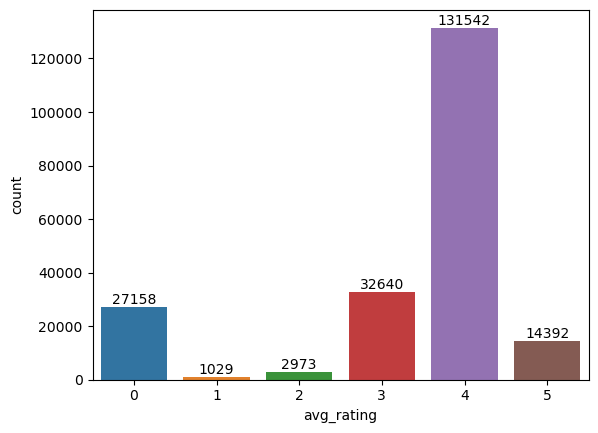

In [69]:
ax = sns.countplot(x ='avg_rating',data =dcom)

for bars in ax.containers:
    ax.bar_label(bars)
    

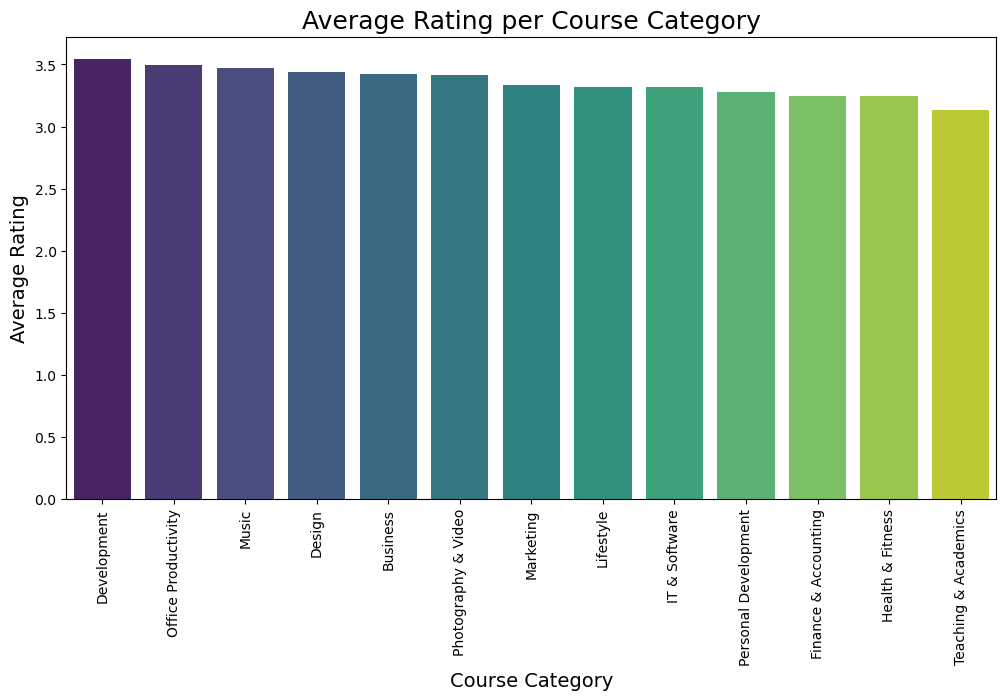

In [97]:
# Calculate the average rating per category
category_avg_rating = dcom.groupby('category')['avg_rating'].mean()

# Sort the values for better visualization
category_avg_rating = category_avg_rating.sort_values(ascending=False)

# Create a bar plot to visualize the average rating per category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette='viridis')

# Add titles and labels
plt.title('Average Rating per Course Category', fontsize=18)
plt.xlabel('Course Category', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


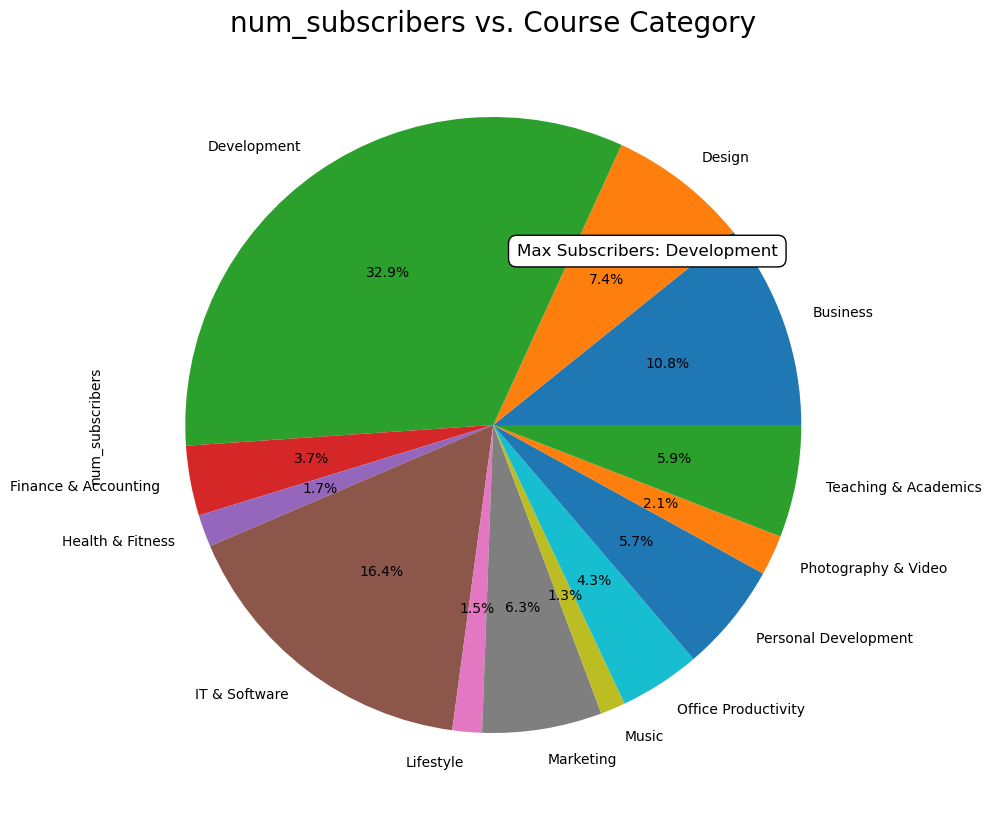

In [71]:
category_subscribers = dcom.groupby('category')['num_subscribers'].sum()

# Find the category with the maximum subscribers
max_subscribers_category = category_subscribers.idxmax()


plt.figure(figsize=(10, 10))
plt.title('num_subscribers vs. Course Category', fontsize=20)
category_subscribers.plot.pie(autopct="%1.1f%%")

# Annotate the category with the maximum subscribers
plt.annotate(f"Max Subscribers: {max_subscribers_category}", 
             xy=(0.5, 0.5), xytext=(0.5, 0.55),
             fontsize=12, ha="center", color="black",
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

### Content Length

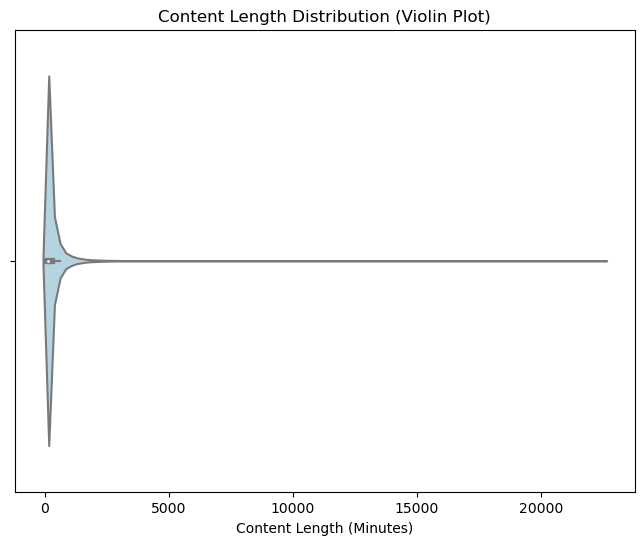

In [111]:
# Create a violin plot for content_length_min
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x=dcom['content_length_min'], color='lightblue')
ax.set_title('Content Length Distribution (Violin Plot)')
ax.set_xlabel('Content Length (Minutes)')
plt.show()



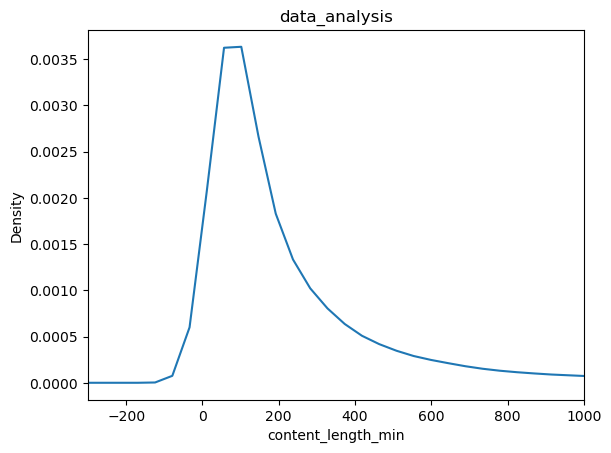

In [112]:
ax = dcom['content_length_min'].plot(kind='kde', title='data_analysis')
ax.set_xlabel('content_length_min')
#dueto presence of outlliers
ax.set_xlim(-300, 1000)  

plt.show()



## Course Languages in Udemy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, 'English'),
  Text(1, 0, 'Portuguese'),
  Text(2, 0, 'Spanish'),
  Text(3, 0, 'Turkish'),
  Text(4, 0, 'Japanese'),
  Text(5, 0, 'German'),
  Text(6, 0, 'French'),
  Text(7, 0, 'Arabic'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Hindi'),
  Text(11, 0, 'Korean'),
  Text(12, 0, 'Indonesian'),
  Text(13, 0, 'Polish'),
  Text(14, 0, 'Traditional Chinese'),
  Text(15, 0, 'Simplified Chinese'),
  Text(16, 0, 'Urdu'),
  Text(17, 0, 'Thai'),
  Text(18, 0, 'Romanian'),
  Text(19, 0, 'Tamil'),
  Text(20, 0, 'Dutch'),
  Text(21, 0, 'Hebrew'),
  Text(22, 0, 'Vietnamese'),
  Text(23, 0, 'Hungarian'),
  Text(24,

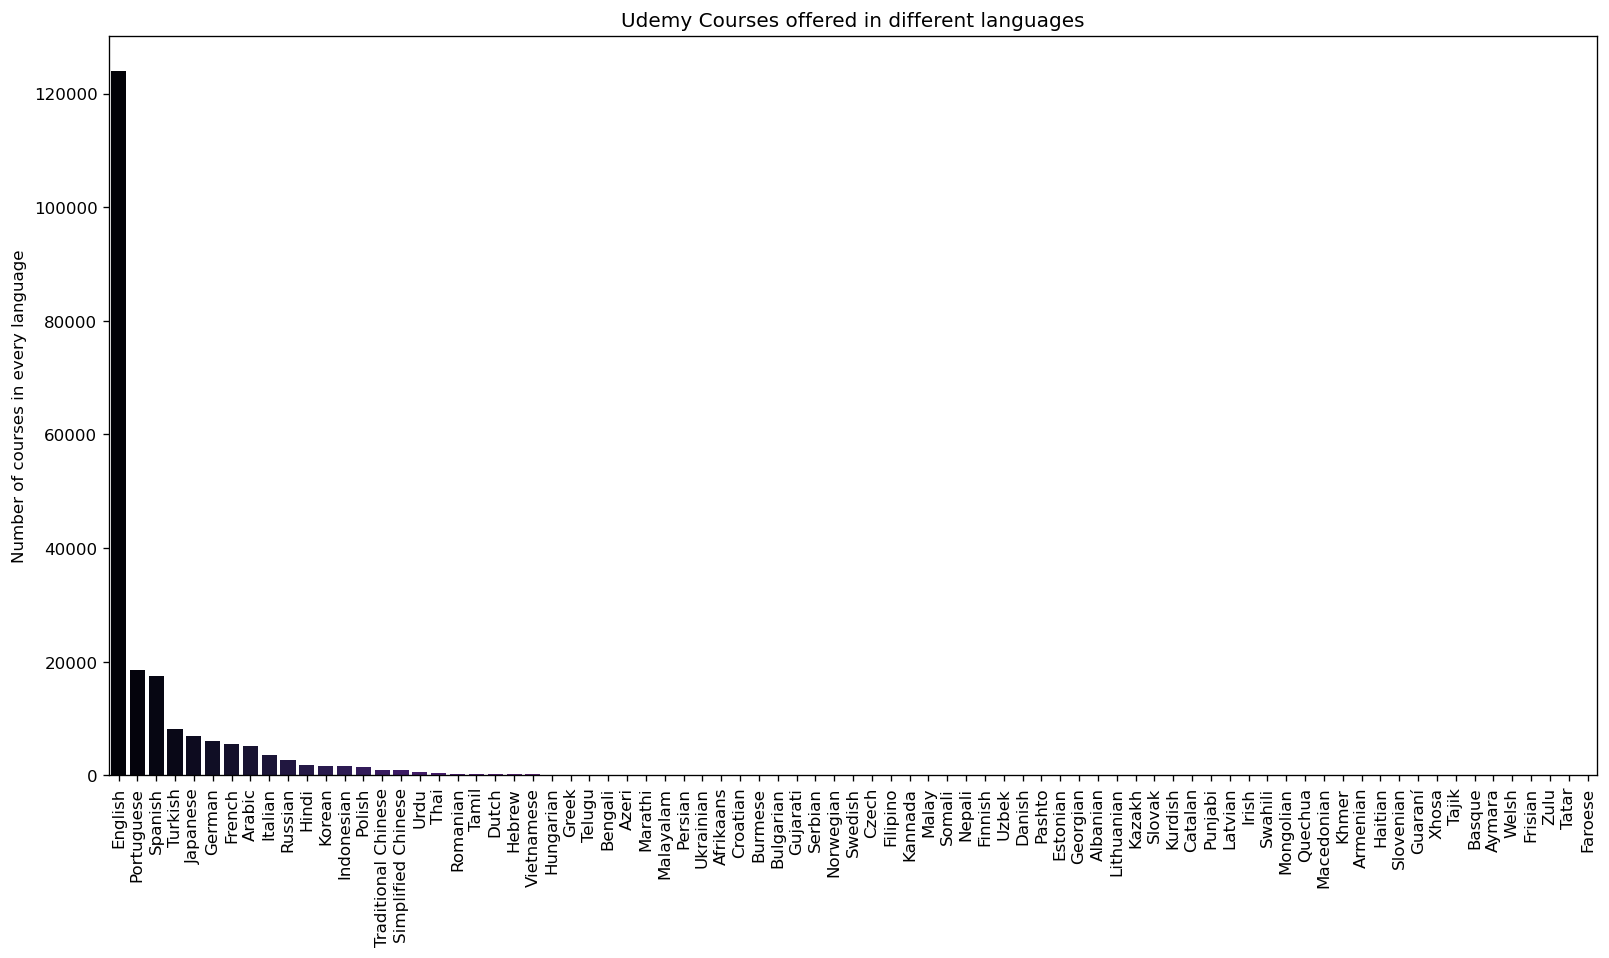

In [98]:
plt.figure(figsize=(16, 8), dpi=120)
sns.countplot(data=dcom, x='language', order=dcom['language'].value_counts().index, palette='magma')
plt.xlabel("")
plt.ylabel("Number of courses in every language")
plt.title("Udemy Courses offered in different languages")
plt.xticks(rotation=90)

## Language Distribution of Udemy Courses

Based on the course dataset, Udemy offers courses in 79 languages. The top three languages are:

- **English**: 59% of the courses
- **Portuguese**: 8.8% of the courses
- **Spanish**: 8.3% of the courses

The top 15 languages in which the courses are offered are visualized in the pie chart below.


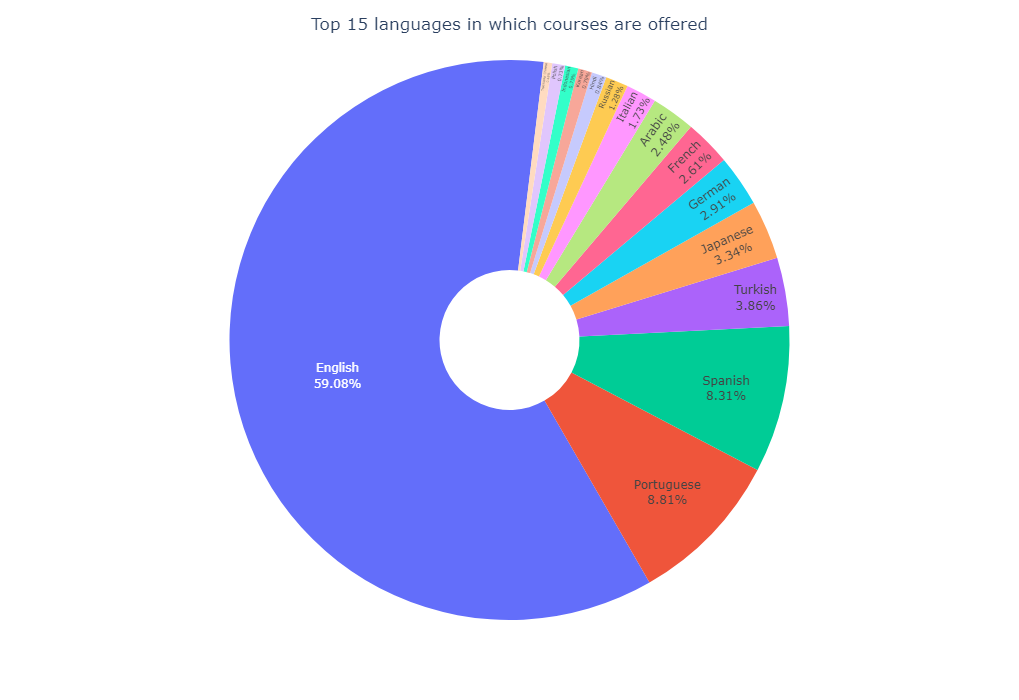

In [77]:
import plotly.express as px

share_of_languages_top_15 = round(dcom['language'].value_counts() * 100 / len(dcom), 2)[:15]

fig = px.pie(share_of_languages_top_15, values=share_of_languages_top_15.values, 
             names=share_of_languages_top_15.index, hole=0.25,
            )
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 15 languages in which courses are offered', title_x=0.5, showlegend=False)
fig.update_layout(
    title_text='Top 15 languages in which courses are offered',
    title_x=0.5,
    showlegend=False,
    width=1000,  
    height=700   
)

fig.show()

## Courses under different categories


### Number of courses in each category

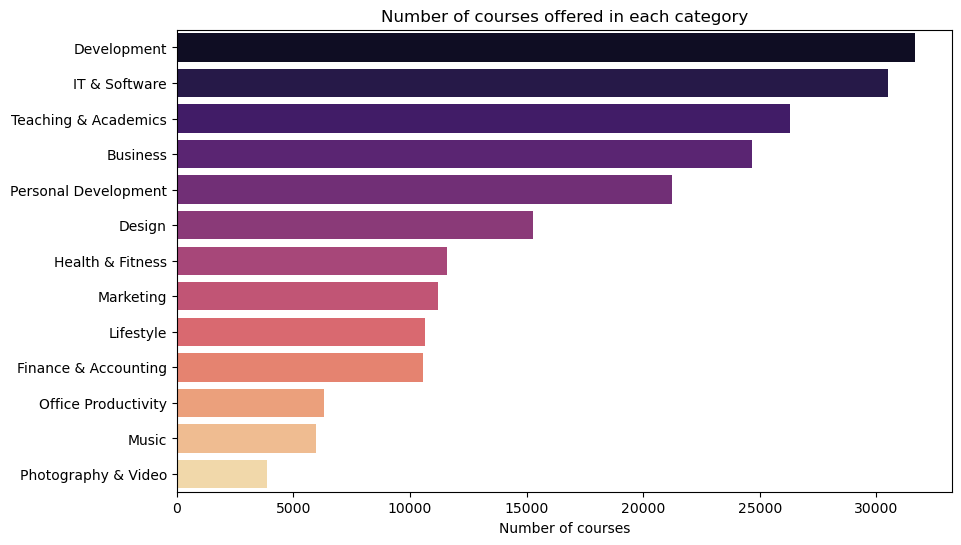

In [78]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=dcom, y='category', order=dcom['category'].value_counts().sort_values(ascending=False).index, palette='magma')
plt.xlabel("Number of courses")
plt.ylabel("")
plt.title("Number of courses offered in each category");

### Number of subscribers in each category

C:\Users\Laser\AppData\Local\Temp\ipykernel_9524\1800679436.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.




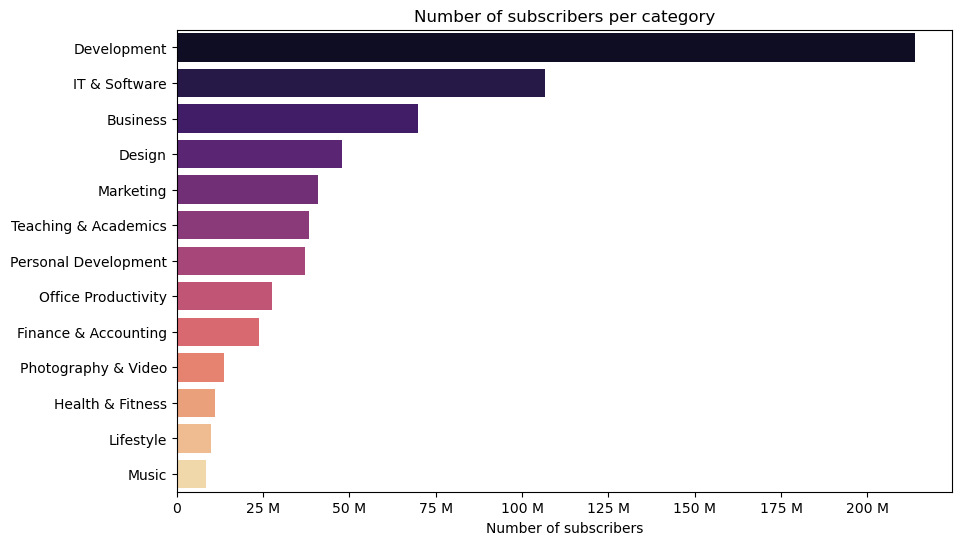

In [79]:
category_subs = dcom.groupby('category')['num_subscribers'].agg('sum').sort_values(ascending=False)

# Bar plot to diplay number of subscribers across categories
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(y=category_subs.index, x=category_subs.values, palette='magma', ci=0)
ax.set_xlabel("Number of subscribers")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title("Number of subscribers per category");

## Udemy Course Categories and Subcategories

Udemy courses are organized into 13 main categories, which are further divided into 130 subcategories. Additionally, there are 3,818 unique topics under which various courses are offered. Below are the key insights from the analysis:

- **Top Categories by Number of Courses**:
  - **Development**: 31,643 courses
  - **IT & Software**: 30,479 courses
  - **Teaching & Academics**: 26,293 courses

- **Top Categories by Number of Subscribers**:
  - **Development**: ~213 Million subscribers
  - **IT & Software**: ~106 Million subscribers
  - **Business**: ~70 Million subscribers


#### Top 5 courses with highest number of subscribers

In [80]:
my_cols = ['title', 'instructor_name', 'price', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']
def top5_courses(df, col):
    top5_df = df.nlargest(5, col).reset_index(drop=True)
    return top5_df[my_cols]

top5_courses(dcom, 'num_subscribers')


,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,Java Tutorial for Complete Beginners,John Purcell,0,96582,1752364,14919,968
1,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199,436457,1612862,39040,1333
2,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149,332598,1108811,36101,1264
3,Automate the Boring Stuff with Python Programming,Al Sweigart,49,102876,1056369,13544,571
4,Machine Learning A-Z™: Hands-On Python & R In ...,Kirill Eremenko,199,162432,896340,22567,2670


#### Top 5 courses with highest number of comments

In [81]:
top5_courses(dcom, 'num_comments')


,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199,436457,1612862,39040,1333
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149,332598,1108811,36101,1264
2,The Web Developer Bootcamp 2022,Colt Steele,199,246624,823805,31001,3827
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199,228108,771176,27723,3939
4,The Complete Digital Marketing Course - 12 Cou...,Rob Percival,199,154985,706339,27540,1363


#### Top 5 courses with highest price

In [82]:
top5_courses(dcom, 'price')


,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,"Oracle Veritabanı Programlama : SQL, PL/SQL, O...",Cihan Özhan,999,570,32834,93,1615
1,Competencias Básicas para Desarrollar un Lider...,"I.G.E. Leadership College, Manuel Echeverría",999,844,3452,308,134
2,ISO 14001: Implementación de un Sistema de Ges...,Rubén Aníbal de la Cruz Clemente,999,346,995,84,297
3,Prevención y Protección contra Incendios en el...,Rubén Aníbal de la Cruz Clemente,999,91,298,34,55
4,React Native ile iOS ve Android Uygulama Geliş...,Yasin Ugurlu,999,838,2940,141,557


#### Top 5 courses with highest number of reviews

In [83]:
top5_courses(dcom, 'num_reviews')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199,436457,1612862,39040,1333
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149,332598,1108811,36101,1264
2,The Web Developer Bootcamp 2022,Colt Steele,199,246624,823805,31001,3827
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199,228108,771176,27723,3939
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,189,172991,626304,24886,2082


#### Top 5 courses with highest content length

In [84]:
top5_courses(dcom, 'content_length_min')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,"Chemistry for IIT JEE Main & Advanced, NEET, A...",Aman Saurav,7,76,463,5,22570
1,Crush Your 2019 New Year's Resolution and Lear...,Mammoth Interactive,199,8,333,3,21353
2,NET ENGLISH COMPLETE COURSE,Kalyani Vallath,7,623,2397,78,17275
3,Comprehensive Human Psychology Course,Bilal Semih Bozdemir,99,4,536,1,15786
4,Kapsamlı Psikoloji Kursu,Bilal Semih Bozdemir,999,328,2384,54,15307


### Subcategory Level Data Visualization

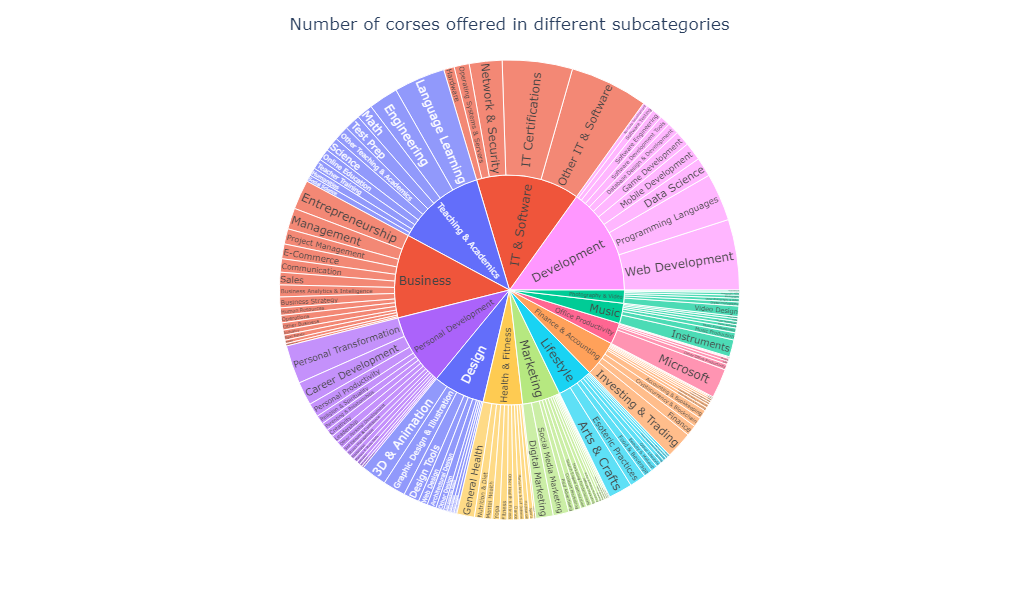

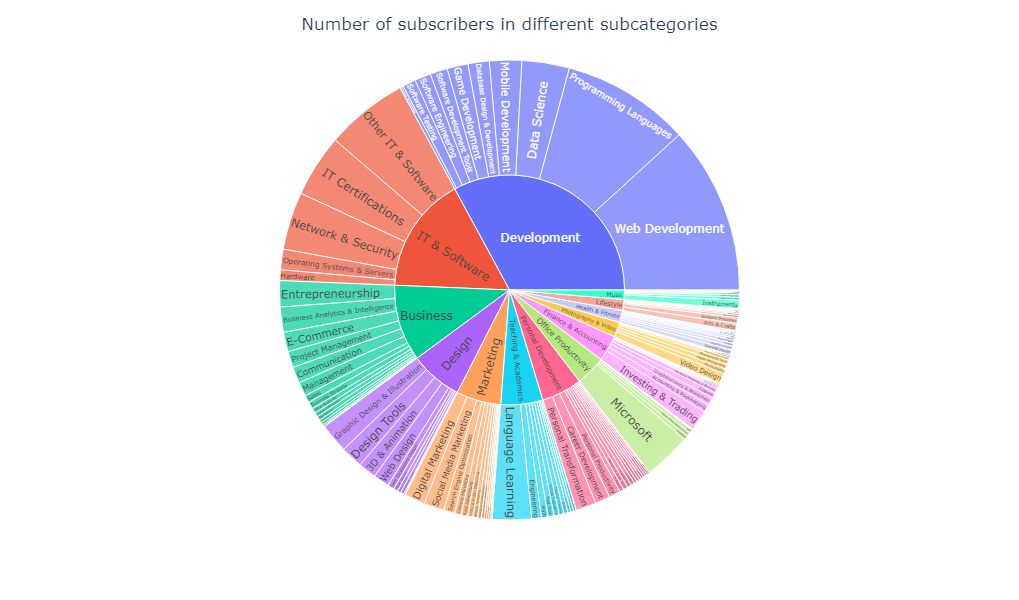

In [85]:
courses_subcat_df = dcom.groupby(['category'])['subcategory'].value_counts().to_frame()
courses_subcat_df.columns = ['number of course']
courses_subcat_df = courses_subcat_df.reset_index()

subscribers_subcat_df = dcom.groupby(['category', 'subcategory'])['num_subscribers'].sum().to_frame()
subscribers_subcat_df.columns = ['number of subscribers']
subscribers_subcat_df = subscribers_subcat_df.reset_index()

# Sunburst chart for number of dcom under each subcategory for different categories
fig = px.sunburst(courses_subcat_df, path=['category', 'subcategory'], 
                  values='number of course', color='category',
                  color_continuous_scale='RdBu', width=600, height=600)
fig.update_layout(title_text='Number of corses offered in different subcategories', title_x=0.5)
fig.show()

# Sunburst chart for number of subscribers under each subcategory for different categories
fig = px.sunburst(subscribers_subcat_df, path=['category', 'subcategory'], values='number of subscribers',
                  color_continuous_scale='RdBu', width=600, height=600)
fig.update_layout(title_text='Number of subscribers in different subcategories', title_x=0.5)
fig.show()


## Insights on Udemy Course Categories and Subcategories

- The **Development** category has the highest number of subscribers, with approximately **213 Million** subscribers.
  - Within the **Development** category:
    - **Web Development**: 76.6 Million subscribers
    - **Programming Languages**: 58.5 Million subscribers

- The **Music** category has the least number of subscribers, with around **8.5 Million** subscribers.
  - Within the **Music** category:
    - **Instruments** subcategory has the highest number of subscribers, with about **3.9 Million**.

### Visualizations:
- **Sunburst charts**: These display the number of courses and subscribers at each subcategory level for different categories, providing a detailed view of subscriber distribution across subcategories.


### Instructor Earnings

In [99]:
dcom['earnings_$'] =  dcom['price'] * dcom['num_subscribers']

instructor_earnings = pd.DataFrame(dcom.groupby('instructor_name')['earnings_$'].sum().round(2))
instructor_earnings = instructor_earnings.sort_values(by='earnings_$', ascending=False)
instructor_earnings['earnings_$'] = instructor_earnings['earnings_$'].apply(lambda x: "{:,}".format(x))

# Top 10 Instructors based on their earnings
print(color.BOLD + 'Top 10 instructors with their earnings in $:' + color.END)
instructor_earnings.head(10)

Top 10 instructors with their earnings in $:


,earnings_$
instructor_name,
Srinidhi Ranganathan,"1,733,219,149"
Learn Tech Plus,"1,190,529,737"
TJ Walker,"1,165,252,263"
Jose Portilla,"814,750,657"
YouAccel Training,"795,724,035"
Creative Online School,"634,751,561"
Robert (Bob) Steele,"626,313,280"
Kirill Eremenko,"540,860,323"
Joseph Delgadillo,"540,727,536"


## Insights on Udemy Instructors' Income

There are **72,731 instructors** on the Udemy platform. The total income of the instructors is calculated by multiplying the **`price`** and **`num_subscribers`** columns. This provides an estimate of their earnings from course sales. 

*Note:* The earnings calculation does not take into account any discounts or coupons that may have been offered, as such data is not available.

### Top 10 Instructors by Income:
The data frame above shows the top 10 instructors based on their calculated income.


## Year-wise data visualization

In [100]:
# published_time column is cleaned and then converted into a datatime object
dcom['published_time'] = pd.to_datetime(dcom['published_time'].str[0:10])
dcom['published_year'] = dcom['published_time'].dt.year
dcom['published_month'] = dcom['published_time'].dt.month_name()

# Group the year column and perform operations for data visualization
courses_year_count = dcom['published_year'].value_counts()

courses_num_subs = dcom.groupby('published_year')['num_subscribers'].sum()

courses_num_reviews = dcom.groupby('published_year')['num_reviews'].sum()

courses_num_comments = dcom.groupby('published_year')['num_comments'].sum()

courses_num_lectures = dcom.groupby('published_year')['num_lectures'].sum()

group_courses_year = pd.pivot_table(dcom, index='published_year', 
                               values=['id', 'num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'], 
                               aggfunc={'id': len, 'num_subscribers': np.sum, 'num_reviews':np.sum, 
                                        'num_comments':np.sum, 'num_lectures':np.sum})

print(color.BOLD + 'Year-wise count and sum values for different features:' + color.END)
group_courses_year

Year-wise count and sum values for different features:


C:\Users\Laser\AppData\Local\Temp\ipykernel_9524\1603666953.py:17: FutureWarning:

The provided callable <function sum at 0x000001EB2B156980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,id,num_comments,num_lectures,num_reviews,num_subscribers
published_year,,,,,
2010,4,408,68,1842,33727
2011,57,13170,4555,60041,1328159
2012,464,71397,25592,358467,7230026
2013,1778,233046,76847,1123207,14813615
2014,3404,461284,140262,2192152,27642396
2015,7102,1113930,298958,6042455,56527397
2016,7975,1470159,367520,7909710,68028864
2017,12258,1712435,561191,9486975,81376285
2018,20653,1568422,941243,8878711,92373156


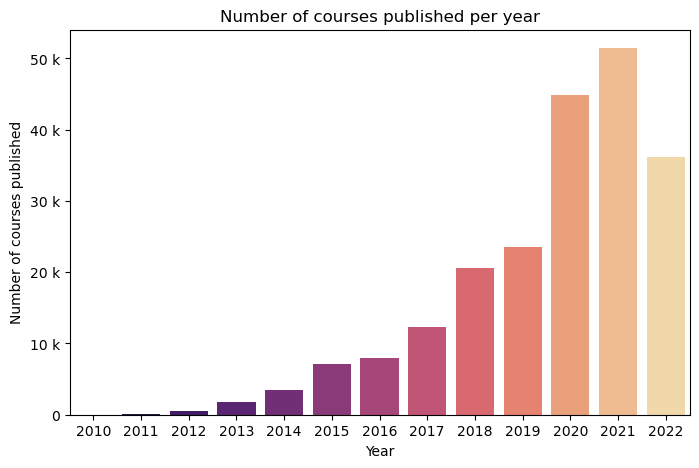

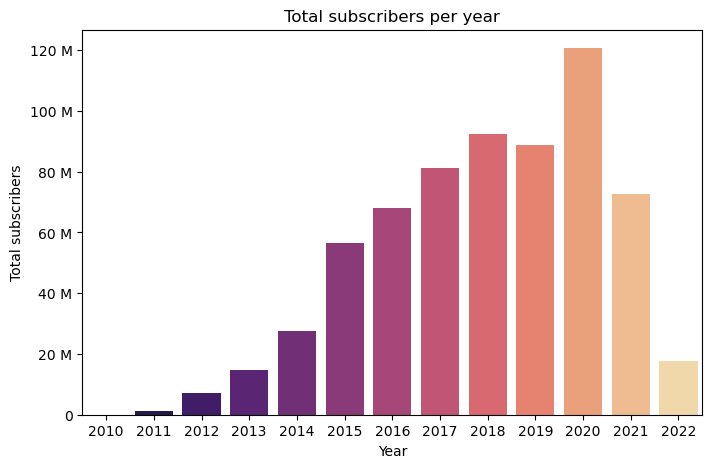

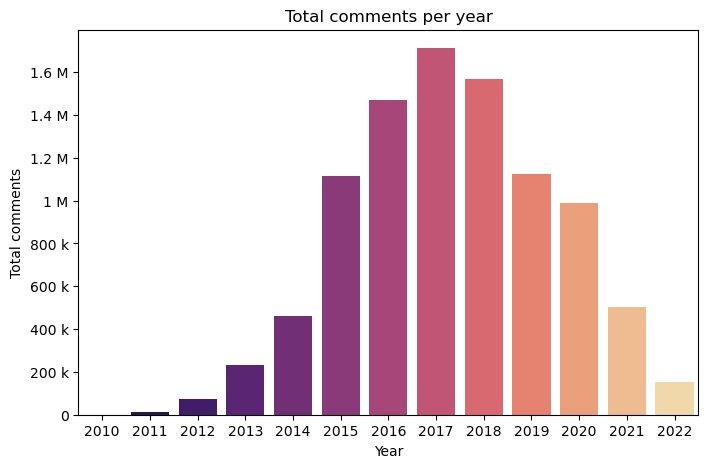

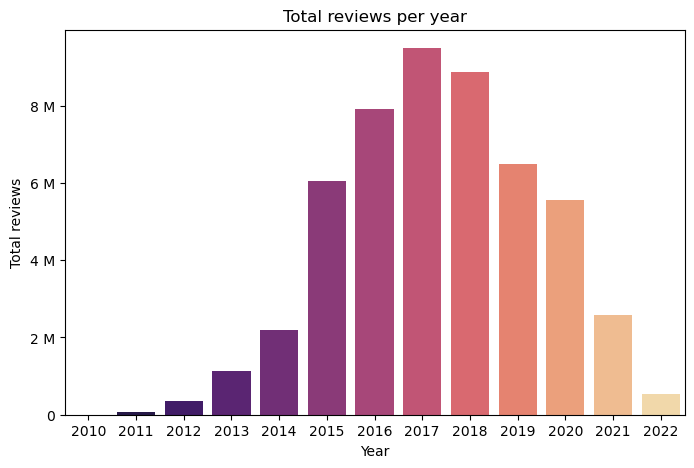

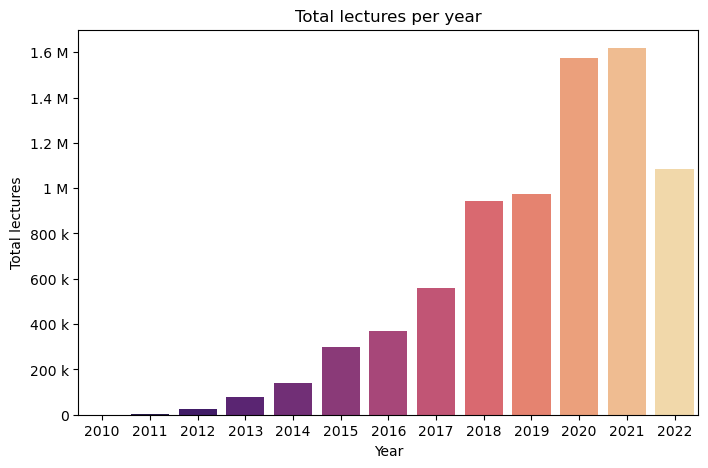

In [101]:
# Visualization of year-wise feature data
dict_cols = dict({'id': 'Number of courses published', 'num_subscribers': 'Total subscribers', 
                  'num_comments': 'Total comments', 'num_reviews': 'Total reviews',
                 'num_lectures': 'Total lectures'})

for key, val in dict_cols.items():
    df = group_courses_year
    fig, ax = plt.subplots(figsize=(8,5), dpi=100)
    sns.barplot(data=df, x=df.index, y=df[key], palette='magma')
    ax.set_xlabel("Year")
    ax.set_ylabel(val)
    ax.set_title(f'{val} per year')
    ax.yaxis.set_major_formatter(ticker.EngFormatter());

# Comments Dataset - EDA

In [86]:
dcour['review'] = pd.cut(dcour['rate'], bins=[0, 2.5, 3.0, 5.0], labels=['Negative', 'Neutral', 'Positive'])
#dcour['review'] = dcour['rate'].apply(lambda x: 'Positive' if x >= 3.0 else 'Negative')
dcour.head()

,id,course_id,rate,date,display_name,comment,review
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...,Negative
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...,Positive
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...,Positive
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...,Positive
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...,Positive


In [87]:
print(color.BOLD + 'Number of missing values:' + color.END)
print(dcour.isnull().sum())
print("---"*20)
print(color.BOLD + 'Percentage of missing values:' + color.END)
print(round(dcour.isnull().mean() * 100, 2))

Number of missing values:
id                  0
course_id           0
rate                0
date                0
display_name    75387
comment          6548
review              0
dtype: int64
------------------------------------------------------------
Percentage of missing values:
id              0.00
course_id       0.00
rate            0.00
date            0.00
display_name    0.80
comment         0.07
review          0.00
dtype: float64


In [88]:
comments = dcour.dropna(axis=0).reset_index(drop=True)

# Mapping the course title from the courses dataframe to dcour dataframe
dict_id = dict(zip(dcom['id'], dcom['title']))
dcour['course_title'] = dcour['course_id'].map(dict_id)

In [89]:
dcour.head()

,id,course_id,rate,date,display_name,comment,review,course_title
0,88962892,3173036,1.0,2021-06-29T18:54:25-07:00,Rahul,I think a beginner needs more than you think.\...,Negative,Ultimate Chess Openings and Tactics
1,125535470,4913148,5.0,2022-10-07T11:17:41-07:00,Marlo,Aviva is such a natural teacher and healer/hea...,Positive,Osteo eCourses - Working With The Electromagne...
2,68767147,3178386,3.5,2020-10-19T06:35:37-07:00,Yamila Andrea,Muy buena la introducción para entender la bas...,Positive,Legislación Alimentaria en Argentina
3,125029758,3175814,5.0,2022-09-30T21:13:49-07:00,Jacqueline,This course is the best on Udemy. This breakd...,Positive,How To Breakdance MASTERCLASS - Street Dance T...
4,76584052,3174896,4.5,2021-01-30T08:45:11-08:00,Anthony,I found this course very helpful. It was full ...,Positive,Digital Marketing for Filmmakers


In [90]:
# Cleaning the date column and keeping only the year, month and day values.
dcour['date'] = dcour['date'].str[0:10]

# Converting the object datatype into datetime datatype
dcour['date'] = pd.to_datetime(dcour['date'])

# Creating new columns for year and month based on date column
dcour['year'] = dcour['date'].dt.year
dcour['month'] = dcour['date'].dt.month_name()

dcour.head()

,id,course_id,rate,date,display_name,comment,review,course_title,year,month
0,88962892,3173036,1.0,2021-06-29,Rahul,I think a beginner needs more than you think.\...,Negative,Ultimate Chess Openings and Tactics,2021,June
1,125535470,4913148,5.0,2022-10-07,Marlo,Aviva is such a natural teacher and healer/hea...,Positive,Osteo eCourses - Working With The Electromagne...,2022,October
2,68767147,3178386,3.5,2020-10-19,Yamila Andrea,Muy buena la introducción para entender la bas...,Positive,Legislación Alimentaria en Argentina,2020,October
3,125029758,3175814,5.0,2022-09-30,Jacqueline,This course is the best on Udemy. This breakd...,Positive,How To Breakdance MASTERCLASS - Street Dance T...,2022,September
4,76584052,3174896,4.5,2021-01-30,Anthony,I found this course very helpful. It was full ...,Positive,Digital Marketing for Filmmakers,2021,January


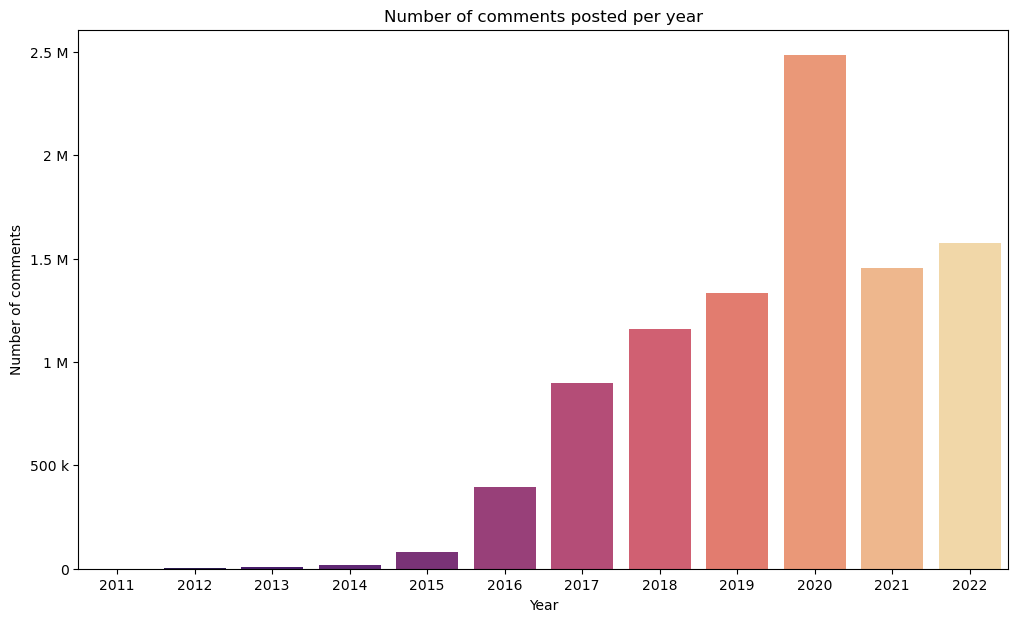

In [91]:
import matplotlib.ticker as ticker
# year-wise arranging comments
year_comments = dcour.groupby('year')['comment'].count()

# Barplot to show the number of comments per year
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
sns.barplot(x=year_comments.index, y=year_comments.values, palette='magma')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel("Number of comments")
ax.set_xlabel("Year")
ax.set_title("Number of comments posted per year");

## Comments Analysis on Udemy Courses

### Total Comments Made Every Year
The bar plot below displays the total number of comments posted each year since Udemy's inception in 2010. 

- **Initial Years (2010-2016)**: Less than 500,000 comments were made during this period.
- **Growth Period (2017-2020)**: The number of comments increased significantly, reaching a peak of nearly 2.5 million in 2020.

### Comments Posted Per Month in 2020
The monthly trend of comments posted during 2020 was analyzed to understand user engagement throughout the year. A detailed visualization is shown below, highlighting variations in activity over the months.

### Visualizations
#### Comments Made Every Year

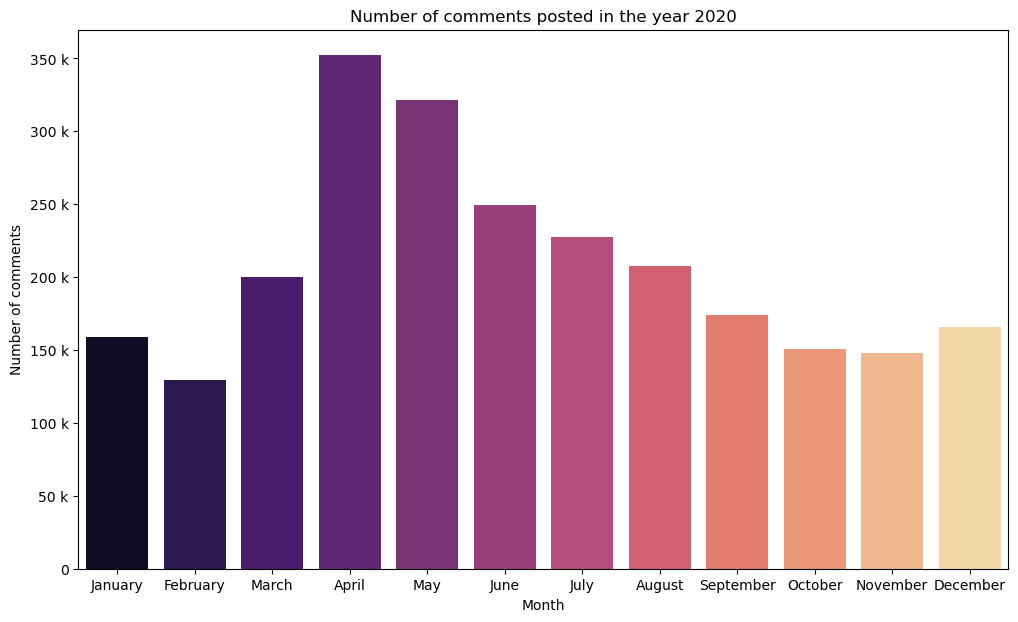

In [92]:
# Month-wise breakup of comments for the year 2020
year_2020 = dcour[dcour['year'] == 2020]
year_2020_month = year_2020.groupby('month')['comment'].count()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Barplot to visualize the comments distribution for different months in 2020
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
sns.countplot(data=year_2020, x=year_2020['month'], palette='magma', order=month_order)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel("Number of comments")
ax.set_xlabel("Month")
ax.set_title("Number of comments posted in the year 2020");

## Conclusion

The two datasets related to Udemy courses and comments were analyzed using data analysis tools. Relationships between features were explored, and new columns were created from existing features. Below is the summary of the findings:

- **Course Pricing**: Nearly 20% of the courses are priced at $19.99. About 10% of the total courses are free of charge.
- **Languages Offered**: Courses are offered in 79 languages, with 59% of the courses taught in English.
- **Category Insights**: The 'Development' category has the highest number of courses and subscribers.
- **Sentiment Analysis**: From the comments dataset:
  - 91% of the comments are positive.
  - 5% of the comments are negative.
  - The remaining comments arPortuguese.
- **Yearly Activity**: The year 2020 recorded the highest number of comments posted on Udemy.


# making joins using sqlite ( comments && courses ) 

In [37]:
# import sqlite3
# import pandas as pd   
# db_path = 'database.db' 
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# course_info_file = 'Course_info.csv'
# course_info_table = 'CourseInfo'
# course_info_df = pd.read_csv(course_info_file)
# course_info_df.to_sql(course_info_table, conn, if_exists='replace', index=False)
# print(f"Data imported successfully into '{course_info_table}' table!")

# comments_file = 'Comments.csv'
# comments_table = 'Comments'
# comments_df = pd.read_csv(comments_file)
# comments_df.to_sql(comments_table, conn, if_exists='replace', index=False)
# print(f"Data imported successfully into '{comments_table}' table!")

# query = """
# SELECT * FROM CourseInfo AS c
# LEFT JOIN (
#     SELECT * FROM (
#         SELECT *, ROW_NUMBER() OVER(PARTITION BY course_id ORDER BY date DESC) AS row_num
#         FROM Comments
#     ) WHERE row_num <= 20
# ) AS cm
# ON c.id = cm.course_id
# """

# result = pd.read_sql(query, conn)

# export_file = 'Joined_Course_Comments.csv'
# result.to_csv(export_file, index=False)
# print(f"Data exported successfully to '{export_file}'")

# conn.close()

In [38]:
path = "Joined_Course_Comments.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns',len(df.columns))
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df.head()  

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,id.1,course_id,rate,date,display_name,comment,row_num
0,4715.0,Online Vegan Vegetarian Cooking School,1,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,8833708.0,4715.0,3.0,2017-08-15T12:44:03-07:00,Isaac,Videos often crashed; first first video didn't...,20.0
1,4715.0,Online Vegan Vegetarian Cooking School,1,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,8925670.0,4715.0,5.0,2017-08-19T16:02:31-07:00,Claudia,"Teacher is highly knowledgeable, friendly spea...",19.0
2,4715.0,Online Vegan Vegetarian Cooking School,1,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,11245168.0,4715.0,5.0,2017-11-23T20:11:02-08:00,Jacqueline,The recipes look delicious. I can't wait to tr...,18.0
3,4715.0,Online Vegan Vegetarian Cooking School,1,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,11525034.0,4715.0,5.0,2017-12-02T11:59:44-08:00,Thania,I gave this course of 5 star because it is ver...,17.0
4,4715.0,Online Vegan Vegetarian Cooking School,1,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,13131310.0,4715.0,5.0,2018-01-25T19:32:06-08:00,Naomi M,I enjoyed watching how quickly the meals were ...,16.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740855 entries, 0 to 1740854
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  float64
 1   title               object 
 2   is_paid             int64  
 3   price               float64
 4   headline            object 
 5   num_subscribers     float64
 6   avg_rating          float64
 7   num_reviews         float64
 8   num_comments        float64
 9   num_lectures        float64
 10  content_length_min  float64
 11  published_time      object 
 12  last_update_date    object 
 13  category            object 
 14  subcategory         object 
 15  topic               object 
 16  language            object 
 17  course_url          object 
 18  instructor_name     object 
 19  instructor_url      object 
 20  id.1                float64
 21  course_id           float64
 22  rate                float64
 23  date                object 
 24  display_name        obje

In [40]:
df.describe(include='all')

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,id.1,course_id,rate,date,display_name,comment,row_num
count,1.740855e+06,1740855,1.740855e+06,1.740855e+06,1740586,1.740855e+06,1.740855e+06,1.740855e+06,1.740855e+06,1.740855e+06,1.740855e+06,1740855,1739139,1740855,1740855,1736148,1740855,1740855,1740807,1739221,1.694116e+06,1.694116e+06,1.694116e+06,1694116,1683768,1693234,1.694116e+06
unique,NaN,208257,NaN,NaN,202743,NaN,NaN,NaN,NaN,NaN,NaN,209562,3532,13,130,3818,79,209734,72731,73514,NaN,NaN,NaN,1678333,413162,1434244,NaN
top,NaN,Python for Beginners,NaN,NaN,Project Management Professional Certification ...,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-06T07:33:16Z,2022-10-03,Development,Web Development,Python,English,/course/vegan-vegetarian-cooking-school/,Packt Publishing,/user/packtpublishing/,NaN,NaN,NaN,2022-10-12T03:26:36-07:00,David,good,NaN
freq,NaN,124,NaN,NaN,448,NaN,NaN,NaN,NaN,NaN,NaN,61,10716,344608,116906,26506,1089002,20,8311,8311,NaN,NaN,NaN,4,8239,15091,NaN
mean,2.407298e+06,NaN,8.730681e-01,8.865376e+01,NaN,6.690866e+03,4.270383e+00,5.716677e+02,1.042483e+02,4.918935e+01,3.430684e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.182611e+07,2.365357e+06,4.357813e+00,NaN,NaN,NaN,8.506818e+00
std,1.325055e+06,NaN,3.328967e-01,1.116469e+02,NaN,2.363217e+04,6.820234e-01,3.791496e+03,5.467562e+02,6.509850e+01,5.477776e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.719567e+07,1.310476e+06,1.037670e+00,NaN,NaN,NaN,5.723390e+00
min,1.769000e+03,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.840000e+02,1.769000e+03,5.000000e-01,NaN,NaN,NaN,1.000000e+00
25%,1.313878e+06,NaN,1.000000e+00,1.999000e+01,NaN,3.110000e+02,4.100000e+00,3.800000e+01,1.100000e+01,1.600000e+01,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.556108e+07,1.290974e+06,4.000000e+00,NaN,NaN,NaN,3.000000e+00
50%,2.369742e+06,NaN,1.000000e+00,4.999000e+01,NaN,1.272000e+03,4.400000e+00,9.900000e+01,2.400000e+01,3.000000e+01,1.740000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.987600e+07,2.325526e+06,5.000000e+00,NaN,NaN,NaN,8.000000e+00
75%,3.546522e+06,NaN,1.000000e+00,1.299000e+02,NaN,5.022000e+03,4.622807e+00,2.860000e+02,6.300000e+01,5.600000e+01,3.770000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.153386e+08,3.482034e+06,5.000000e+00,NaN,NaN,NaN,1.300000e+01


In [41]:
df.isna().sum().to_frame()

,0
id,0
title,0
is_paid,0
price,0
headline,269
num_subscribers,0
avg_rating,0
num_reviews,0
num_comments,0
num_lectures,0


In [42]:
df.dropna(inplace=True)
df.shape

(1675374, 27)

In [43]:
df.drop(columns=['id.1','course_id','rate','row_num'],inplace=True)
df.drop(columns=['headline', 'title', 'published_time', 'last_update_date', 'course_url', 'instructor_url','date','display_name'],inplace=True)

columns = df.columns
continuous_col = df.select_dtypes(include=['float64', 'int64']).columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

print(categorical_col)
print(continuous_col)

Index(['category', 'subcategory', 'topic', 'language', 'instructor_name',
       'comment'],
      dtype='object')
Index(['id', 'is_paid', 'price', 'num_subscribers', 'avg_rating',
       'num_reviews', 'num_comments', 'num_lectures', 'content_length_min'],
      dtype='object')


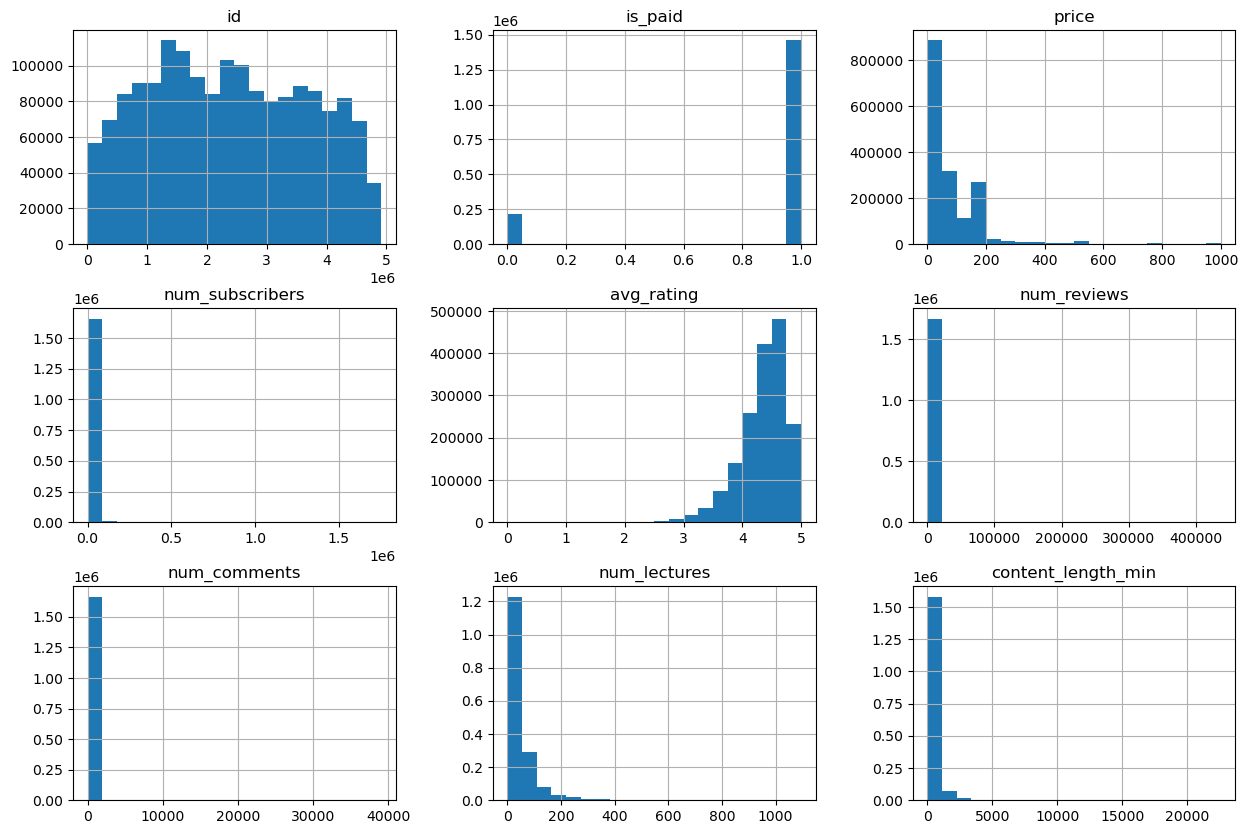

In [44]:
dist = df[continuous_col]
dist.hist(figsize=(15, 10), bins=20)
plt.show()

In [45]:
print("\nCategorical Column Distributions:")
for col in categorical_col:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(15))


Categorical Column Distributions:

Column: category
category
Development             336612
IT & Software           252902
Business                207804
Teaching & Academics    148575
Personal Development    142917
Design                  130423
Marketing                95215
Finance & Accounting     79393
Lifestyle                74775
Health & Fitness         67496
Office Productivity      60627
Music                    44688
Photography & Video      33947
Name: count, dtype: int64

Column: subcategory
subcategory
Web Development                  114359
Other IT & Software              105474
Programming Languages             72535
IT Certifications                 61143
Network & Security                49478
Language Learning                 45513
Microsoft                         41696
Personal Transformation           37513
Investing & Trading               34502
Entrepreneurship                  34113
3D & Animation                    30723
Mobile Development                29

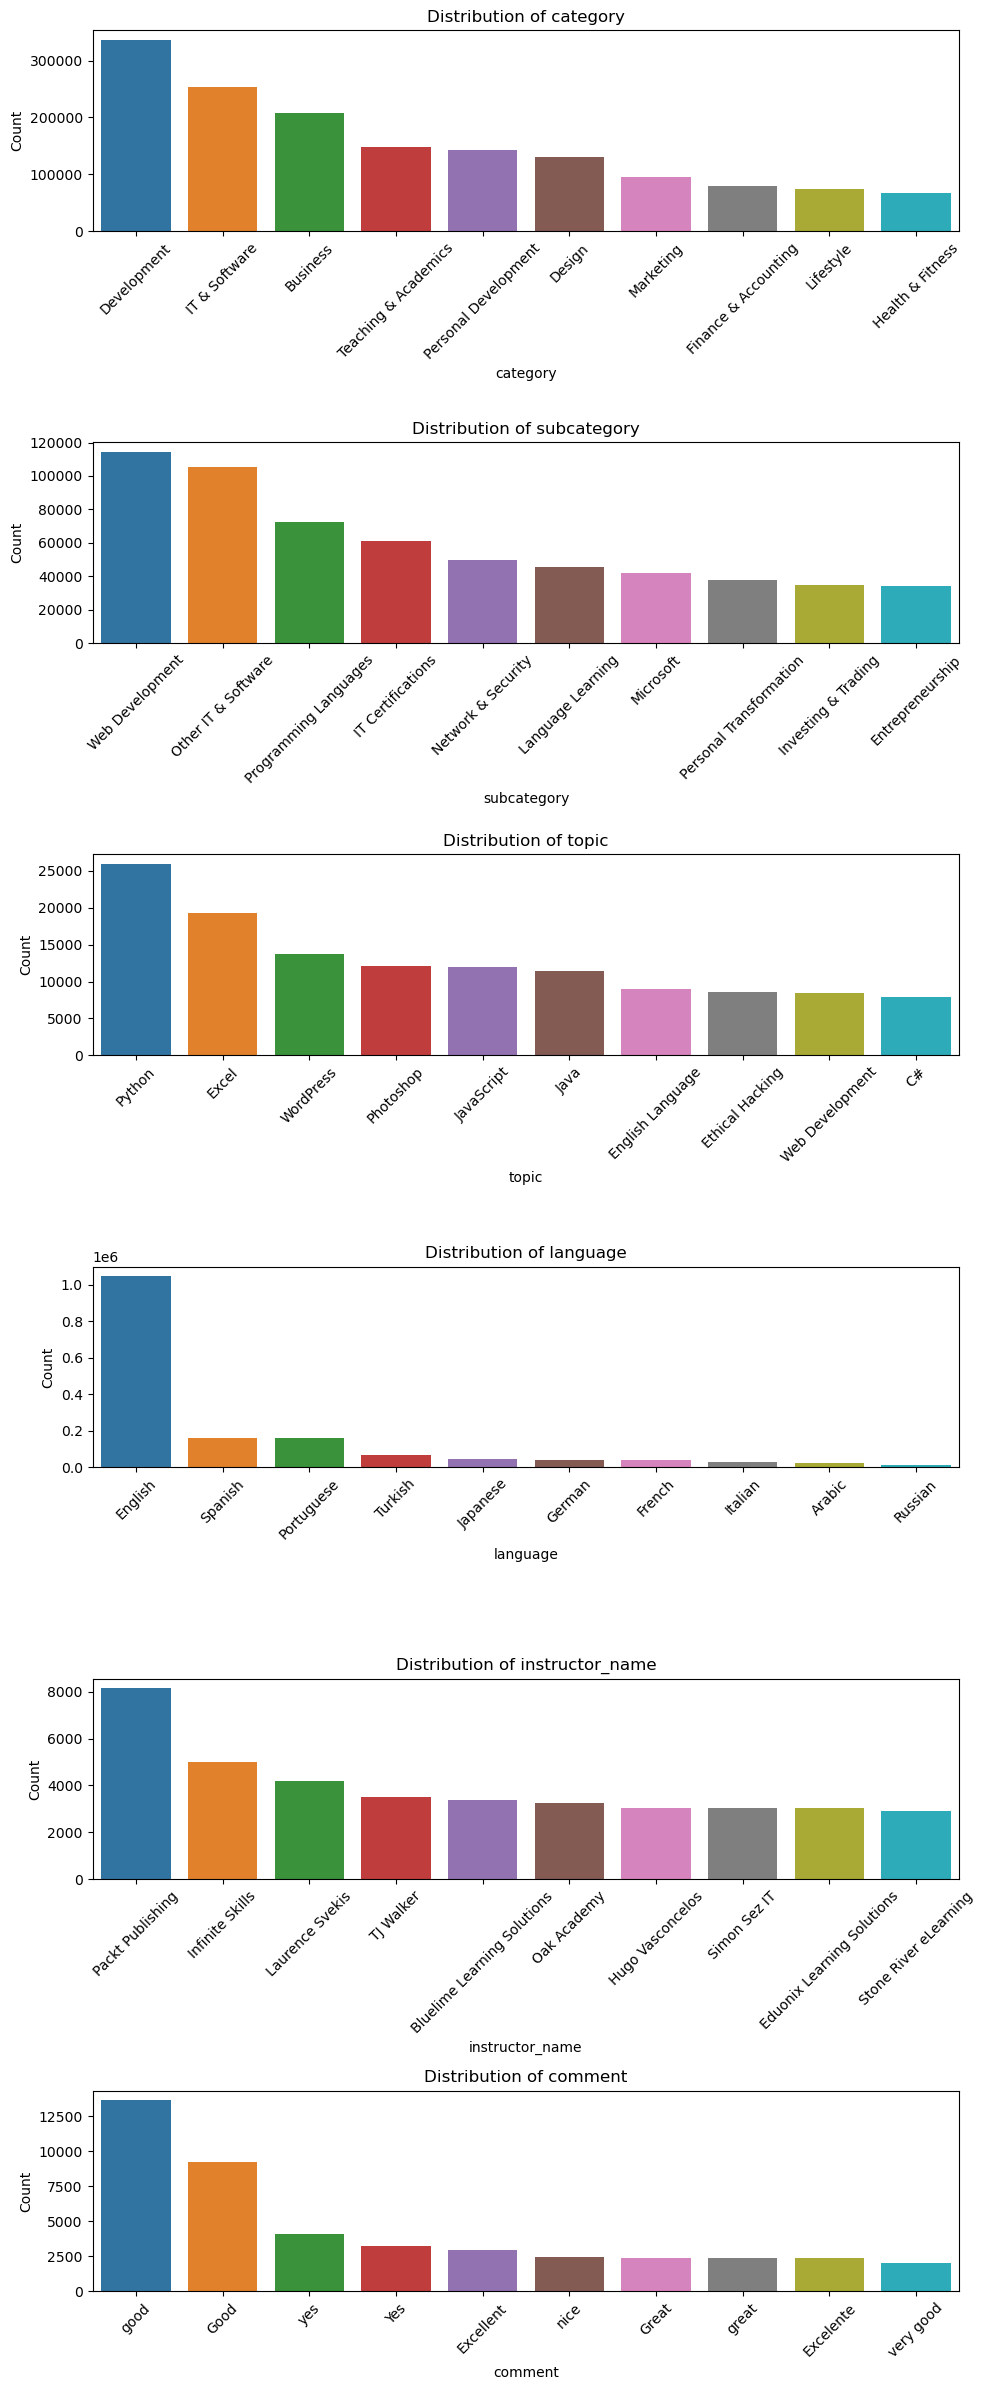

In [46]:
fig, axes = plt.subplots(len(categorical_col), 1, figsize=(10, 4 * len(categorical_col)))
for i, col in enumerate(categorical_col):
    ax = axes[i]
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

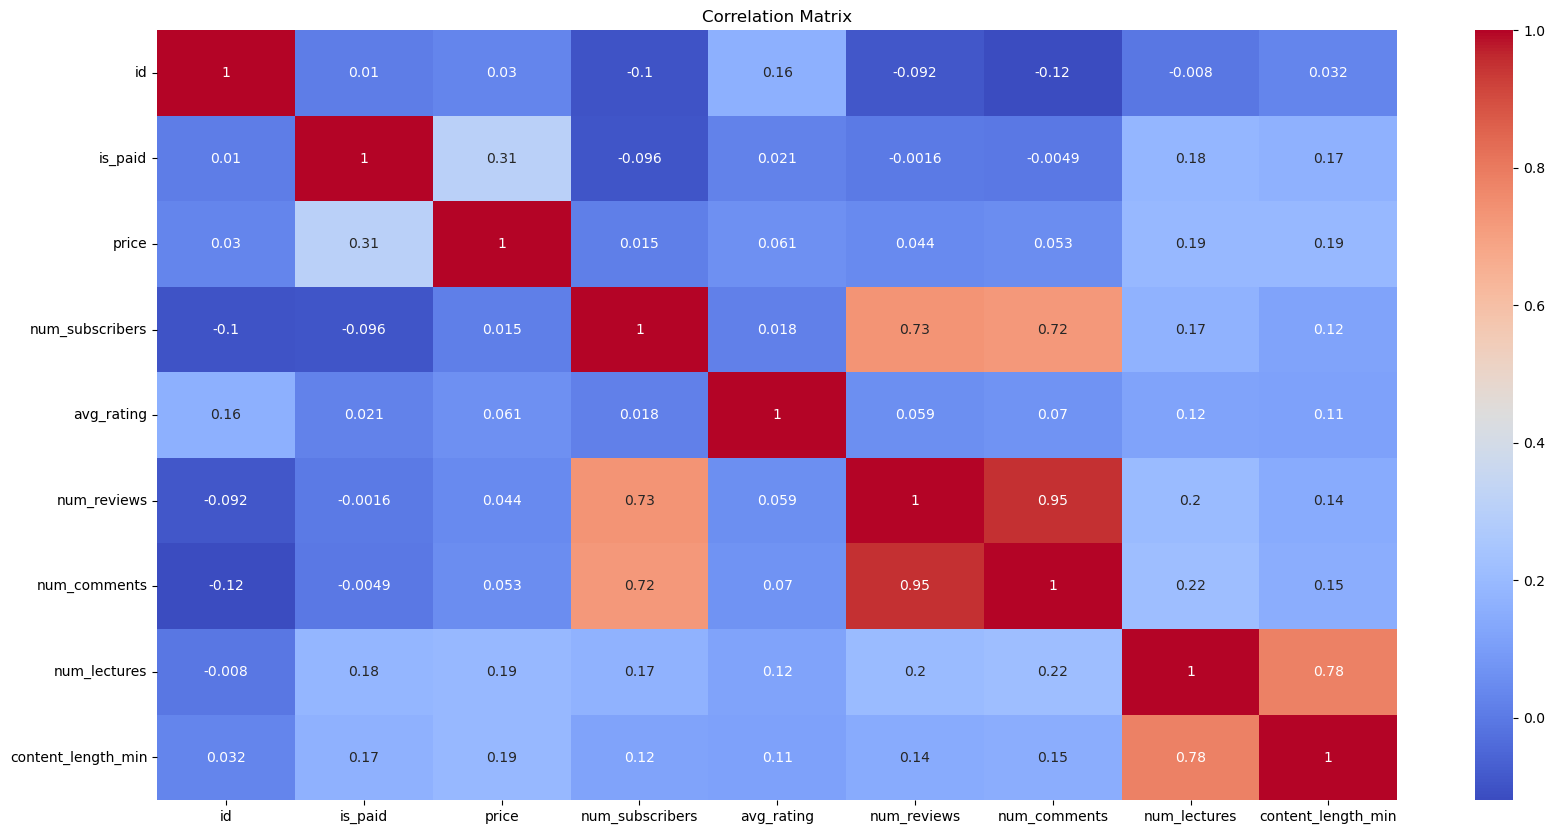

In [47]:
corr_matrix = df[continuous_col].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# handling outliears 

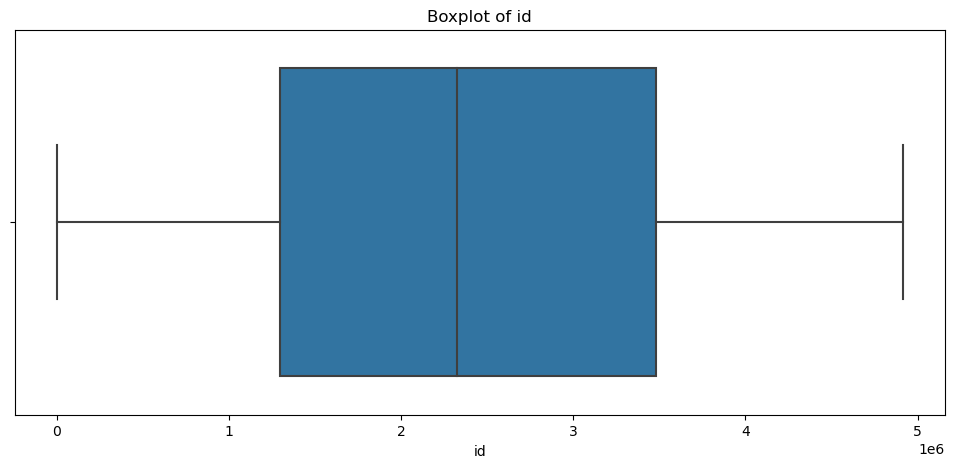

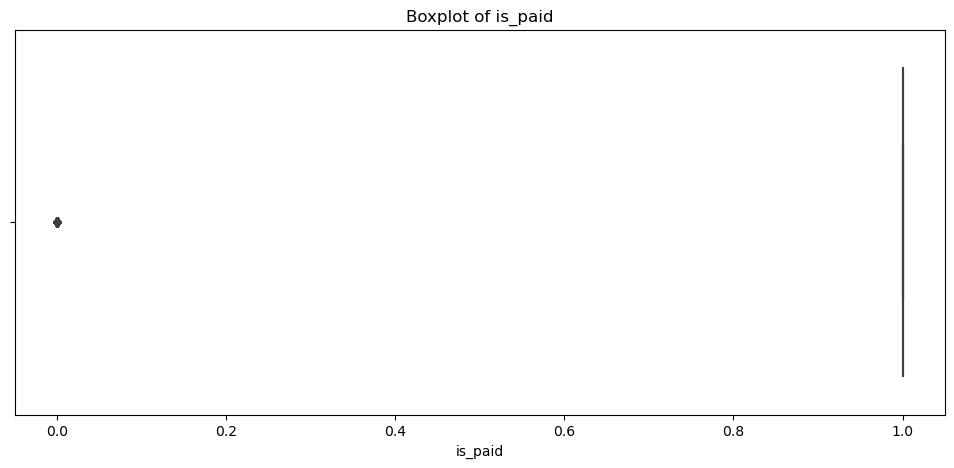

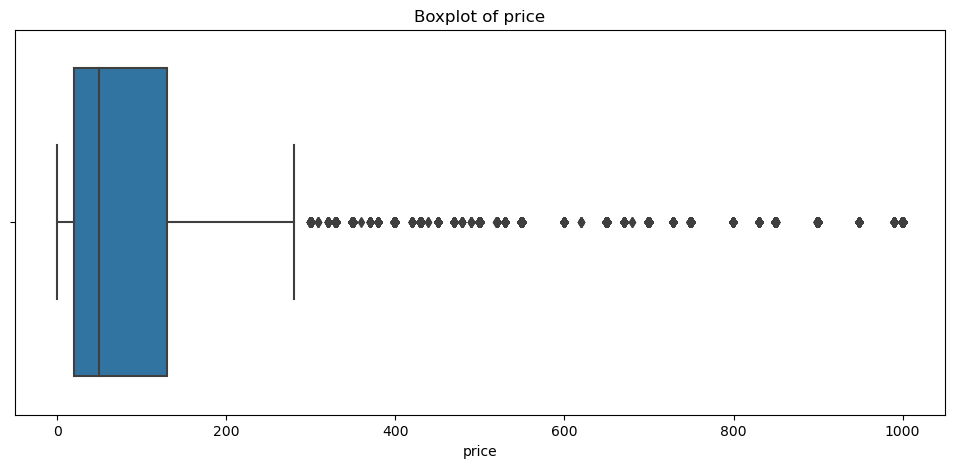

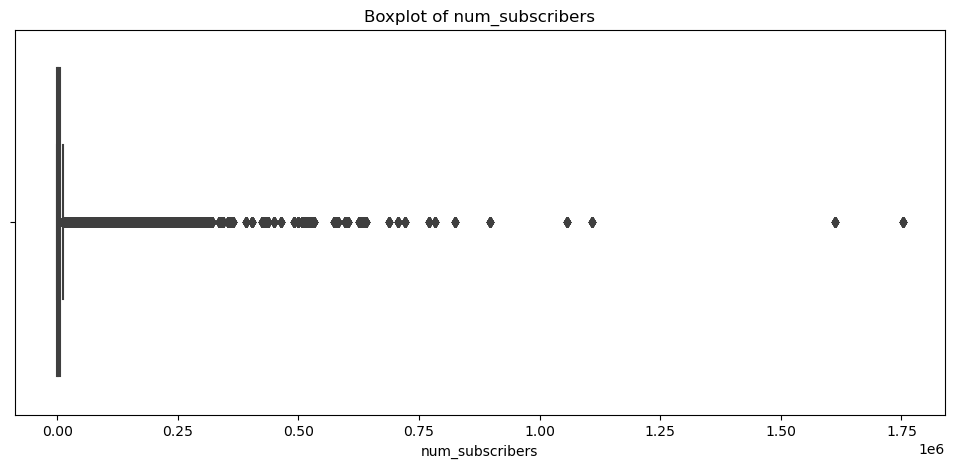

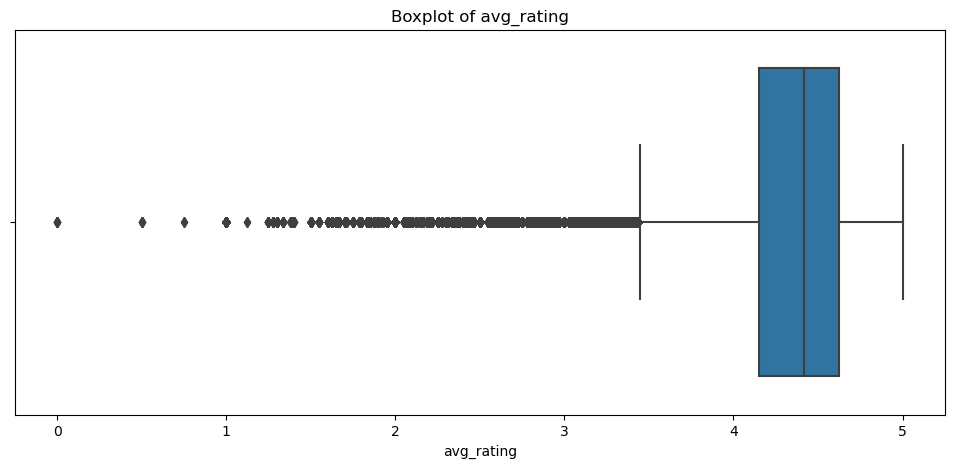

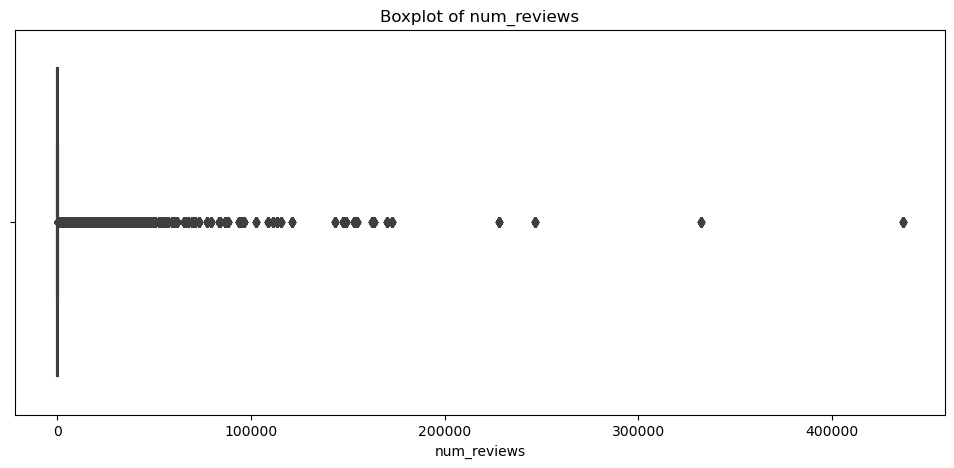

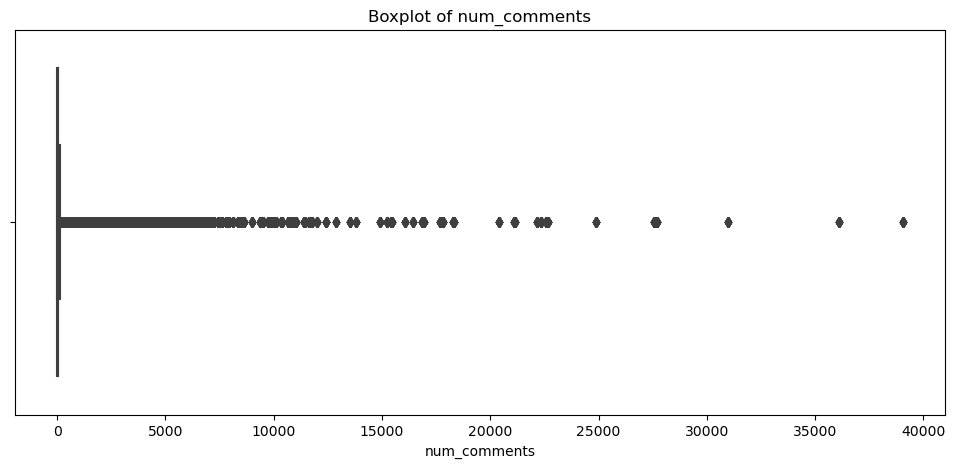

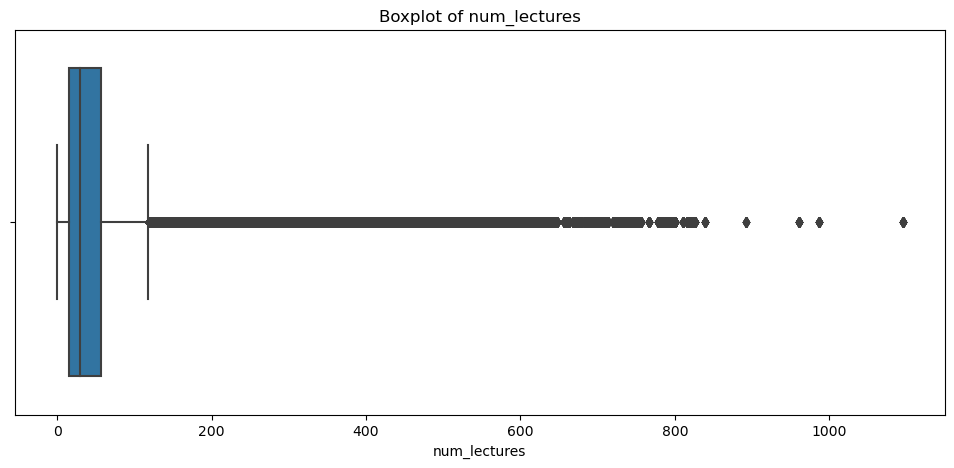

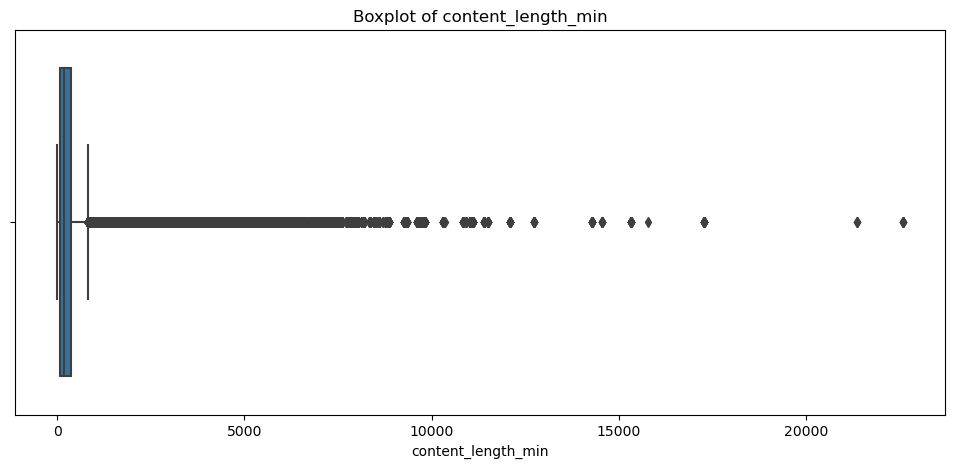

In [48]:
for col in continuous_col:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [49]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in continuous_col:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in id: 0
Number of outliers in is_paid: 216704
Number of outliers in price: 58926
Number of outliers in num_subscribers: 205830
Number of outliers in avg_rating: 57132
Number of outliers in num_reviews: 214559
Number of outliers in num_comments: 205126
Number of outliers in num_lectures: 138454
Number of outliers in content_length_min: 155264


In [50]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in continuous_col:
    df = remove_outliers_iqr(df, col)

print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (850390, 15)


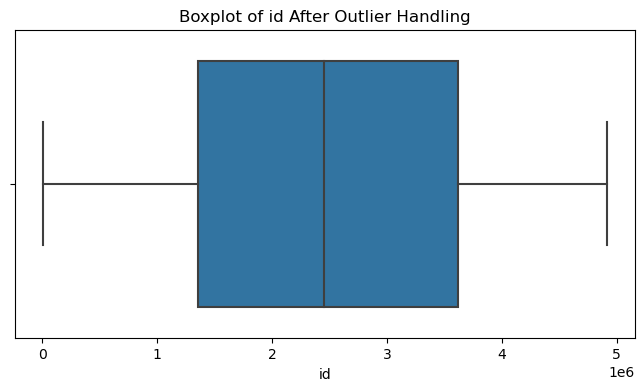

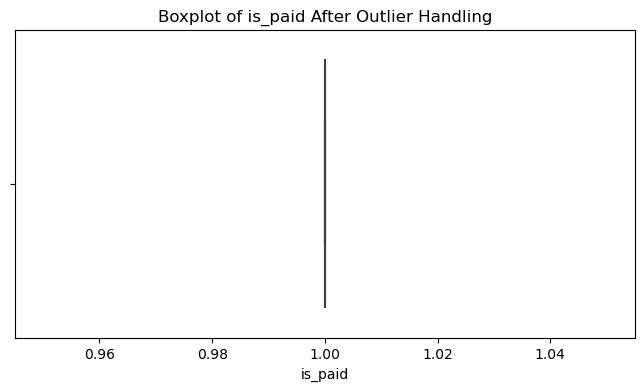

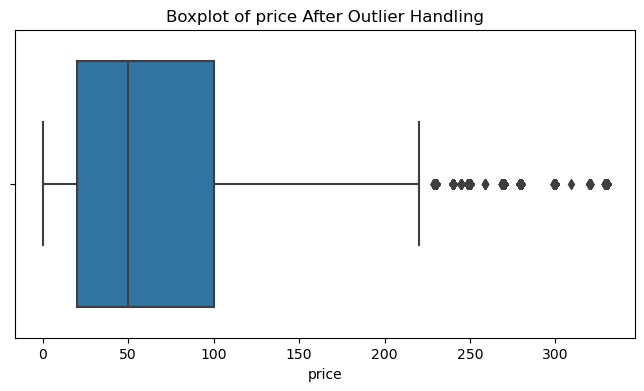

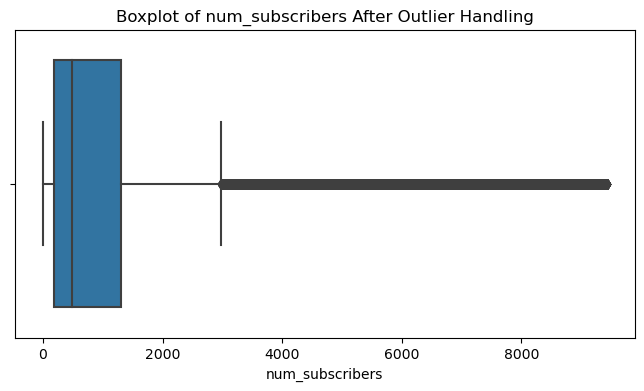

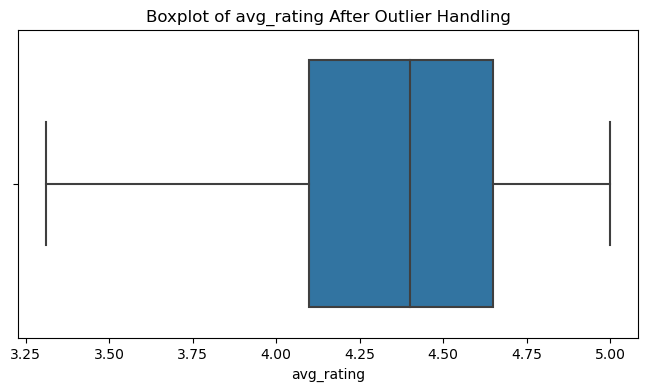

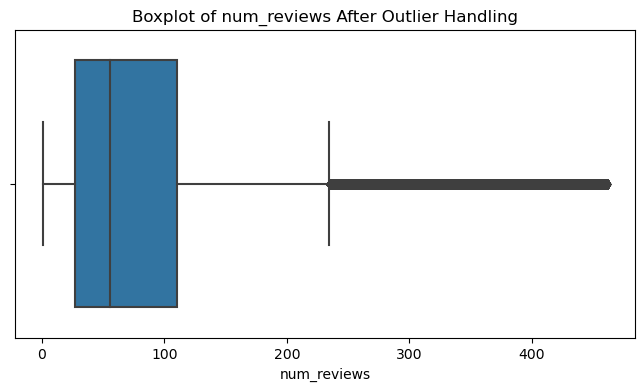

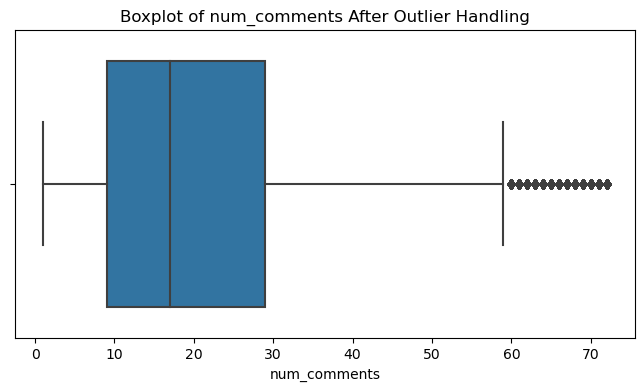

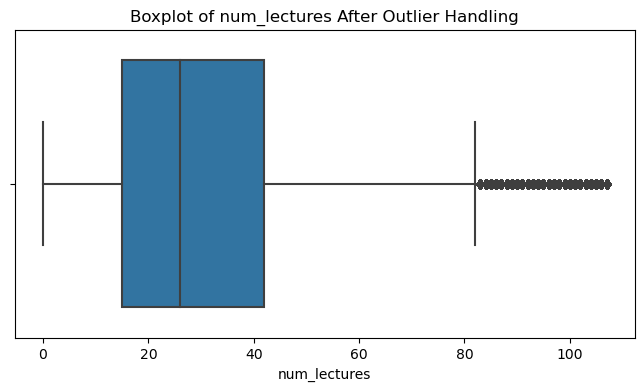

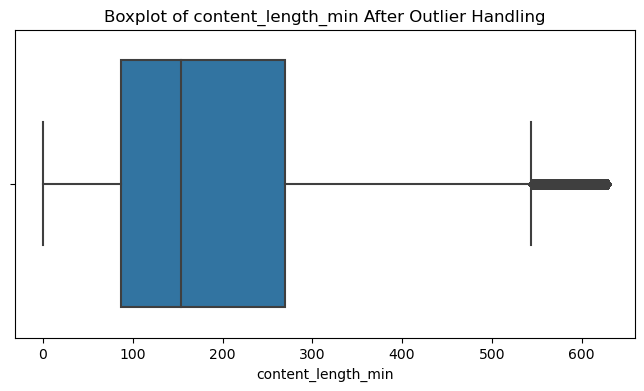

In [51]:
for col in continuous_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} After Outlier Handling")
    plt.show()

In [52]:
categories_to_include = ['Development', 'IT & Software', 'Business', 'Teaching & Academics']
sent = df[df['category'].isin(categories_to_include)]
sent

,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,category,subcategory,topic,language,instructor_name,comment
221,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,"Overall, I've found these tutorials immensely ..."
222,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,I have taken many IOS Development couses and r...
223,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,It's Great
224,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,"In these days of portability, nothing is worse..."
225,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,"Love the presentation, but the code presented ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740800,4911372.0,1,19.99,511.0,5.000000,2.0,1.0,0.0,0.0,IT & Software,IT Certifications,AWS Certification,English,ازموس ابراهيم,Amazing content! Appropriate depth!
1740831,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,I am happy and I expect this course change me ...
1740832,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,Great Job
1740833,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,Have enjoyed the lectures and I can boldly sta...


In [53]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435146 entries, 221 to 1740834
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  435146 non-null  float64
 1   is_paid             435146 non-null  int64  
 2   price               435146 non-null  float64
 3   num_subscribers     435146 non-null  float64
 4   avg_rating          435146 non-null  float64
 5   num_reviews         435146 non-null  float64
 6   num_comments        435146 non-null  float64
 7   num_lectures        435146 non-null  float64
 8   content_length_min  435146 non-null  float64
 9   category            435146 non-null  object 
 10  subcategory         435146 non-null  object 
 11  topic               435146 non-null  object 
 12  language            435146 non-null  object 
 13  instructor_name     435146 non-null  object 
 14  comment             435146 non-null  object 
dtypes: float64(8), int64(1), object(6)
m

# Encoding Categorical Variables

In [54]:
def is_positive(comment):
    if pd.isna(comment):
        return 'Neutral'
    sentiment = TextBlob(comment).sentiment.polarity
    return 'Positive' if sentiment > 0 else 'Negative'

sent['comment_sentiment'] = sent['comment'].apply(is_positive)

export_file = 'Course_Comments_Sentiment.csv'
sent.drop(columns=['comment'],inplace=True)
sent.to_csv(export_file, index=False)
sent.head(5)

x = pd.read_csv('Course_Comments_Sentiment.csv')
x

C:\Users\adham\AppData\Local\Temp\ipykernel_17164\3935807820.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\adham\AppData\Local\Temp\ipykernel_17164\3935807820.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,category,subcategory,topic,language,instructor_name,comment_sentiment
0,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,Positive
1,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,Positive
2,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,Positive
3,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,Positive
4,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,Development,Mobile Development,iOS Development,English,Infinite Skills,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435141,4911372.0,1,19.99,511.0,5.000000,2.0,1.0,0.0,0.0,IT & Software,IT Certifications,AWS Certification,English,ازموس ابراهيم,Positive
435142,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,Positive
435143,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,Positive
435144,4911668.0,1,84.99,2009.0,4.214286,9.0,4.0,37.0,397.0,Business,Entrepreneurship,Copywriting,English,Passive Income Gen Z,Positive


In [55]:
categorical_col = x.select_dtypes(include=['object', 'category']).columns
print(categorical_col)

Index(['category', 'subcategory', 'topic', 'language', 'instructor_name',
       'comment_sentiment'],
      dtype='object')


In [56]:
print(x.columns)


Index(['id', 'is_paid', 'price', 'num_subscribers', 'avg_rating',
       'num_reviews', 'num_comments', 'num_lectures', 'content_length_min',
       'category', 'subcategory', 'topic', 'language', 'instructor_name',
       'comment_sentiment'],
      dtype='object')


In [57]:
le = LabelEncoder()
encoded_sent =x.copy()
for col in categorical_col:
    encoded_sent[col] = le.fit_transform(x[col])
    
encoded_sent.head(5)    

,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,category,subcategory,topic,language,instructor_name,comment_sentiment
0,8416.0,1,49.99,2058.0,3.65,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1
1,8416.0,1,49.99,2058.0,3.65,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1
2,8416.0,1,49.99,2058.0,3.65,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1
3,8416.0,1,49.99,2058.0,3.65,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1
4,8416.0,1,49.99,2058.0,3.65,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1


In [58]:
categorical_col = encoded_sent.select_dtypes(include=['object', 'category']).columns
print(categorical_col)

Index([], dtype='object')


In [59]:
encoded_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435146 entries, 0 to 435145
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  435146 non-null  float64
 1   is_paid             435146 non-null  int64  
 2   price               435146 non-null  float64
 3   num_subscribers     435146 non-null  float64
 4   avg_rating          435146 non-null  float64
 5   num_reviews         435146 non-null  float64
 6   num_comments        435146 non-null  float64
 7   num_lectures        435146 non-null  float64
 8   content_length_min  435146 non-null  float64
 9   category            435146 non-null  int32  
 10  subcategory         435146 non-null  int32  
 11  topic               435146 non-null  int32  
 12  language            435146 non-null  int32  
 13  instructor_name     435146 non-null  int32  
 14  comment_sentiment   435146 non-null  int32  
dtypes: float64(8), int32(6), int64(1)


In [60]:
continuous_col =encoded_sent.select_dtypes(include=['float64', 'int64','int32']).columns
print(continuous_col)

Index(['id', 'is_paid', 'price', 'num_subscribers', 'avg_rating',
       'num_reviews', 'num_comments', 'num_lectures', 'content_length_min',
       'category', 'subcategory', 'topic', 'language', 'instructor_name',
       'comment_sentiment'],
      dtype='object')


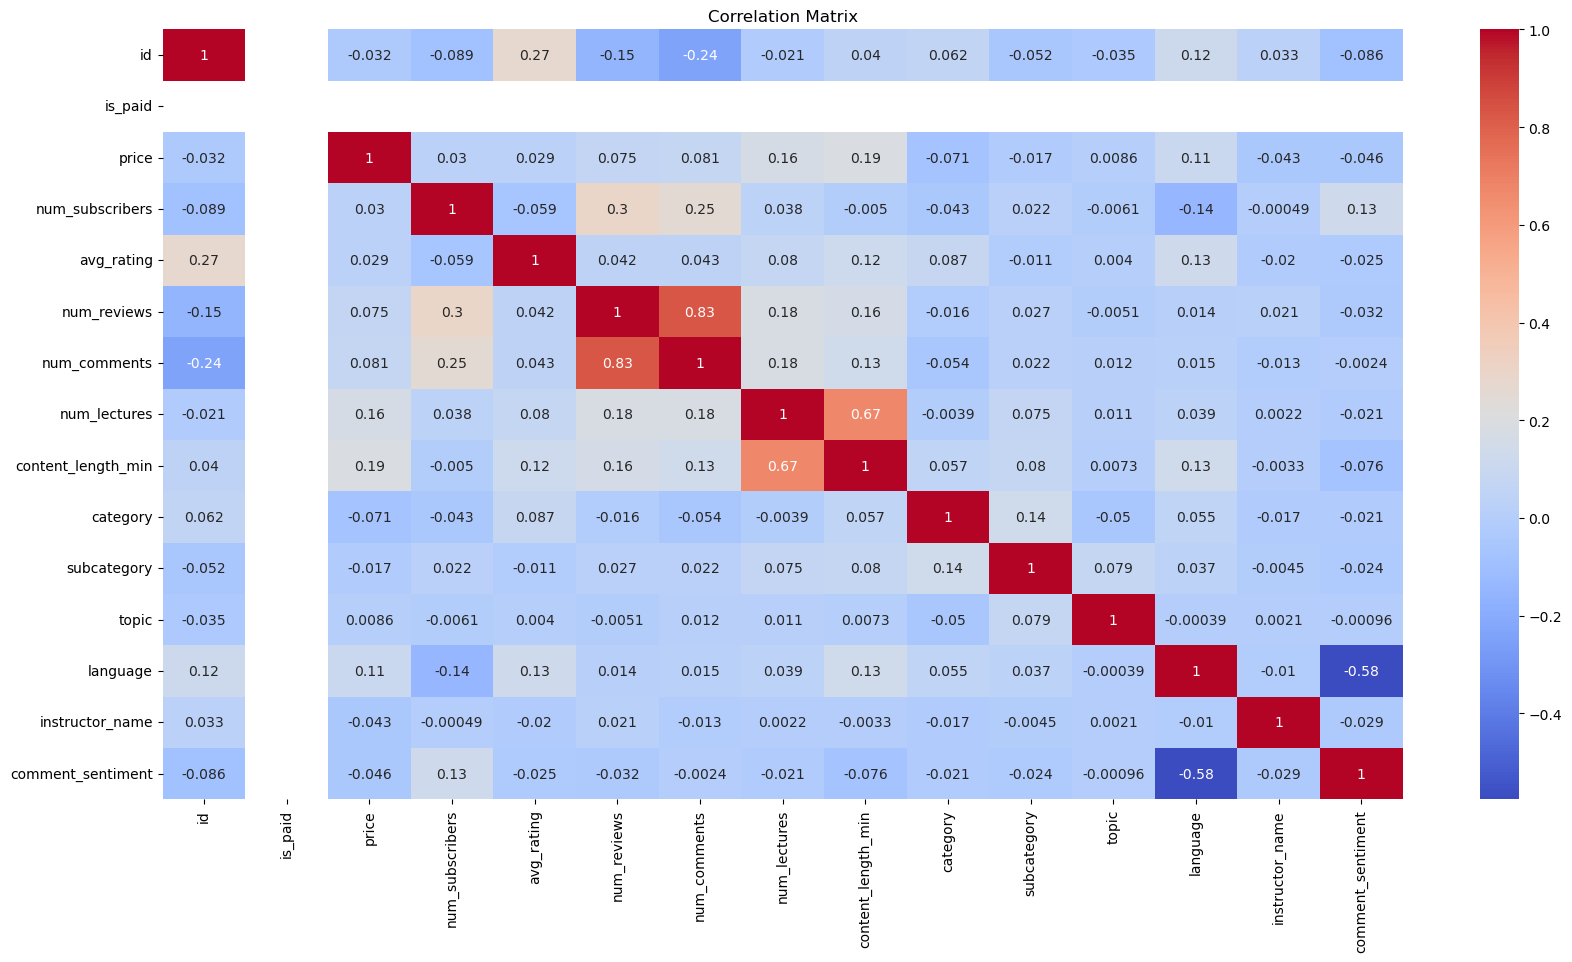

In [61]:
corr_matrix = encoded_sent[continuous_col].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [62]:
encoded_sent.shape

(435146, 15)

# good or bad course

In [63]:
grouped = encoded_sent.groupby(['id', 'is_paid', 'price', 'num_subscribers', 'avg_rating',
       'num_reviews', 'num_comments', 'num_lectures', 'content_length_min',
       'category', 'subcategory', 'topic', 'language', 'instructor_name'])['comment_sentiment']

sentiment_summary = grouped.apply(lambda x: (x ==1).mean() * 100)

summary_df = sentiment_summary.reset_index(name='positive_percentage')

summary_df['course_sentiment'] = summary_df['positive_percentage'].apply(lambda x: 1 if x > 50 else 0)

summary_df.drop(columns=['positive_percentage'], inplace=True)

print(summary_df['course_sentiment'].value_counts())
summary_df.to_csv('Aggregated_Course_Sentiment.csv', index=False)
summary_df

course_sentiment
1    27924
0    22229
Name: count, dtype: int64


,id,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,category,subcategory,topic,language,instructor_name,course_sentiment
0,8416.0,1,49.99,2058.0,3.650000,25.0,8.0,81.0,459.0,1,19,3019,12,9159,1
1,8621.0,1,89.99,388.0,3.600000,20.0,6.0,64.0,178.0,3,37,2160,12,15303,1
2,9327.0,1,49.99,122.0,4.450000,14.0,4.0,64.0,273.0,3,15,2508,12,13147,1
3,9521.0,1,49.99,991.0,3.550000,64.0,23.0,104.0,515.0,0,8,952,12,3106,1
4,9646.0,1,179.99,1276.0,4.000000,235.0,63.0,59.0,553.0,2,10,2541,12,13808,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50148,4910362.0,1,99.99,6.0,4.250000,2.0,1.0,22.0,57.0,3,32,2297,12,1261,1
50149,4910494.0,1,19.99,1.0,4.500000,1.0,1.0,0.0,0.0,2,13,2443,12,3828,1
50150,4910678.0,1,2.00,2.0,4.500000,2.0,1.0,11.0,81.0,3,38,2740,26,22823,0
50151,4911372.0,1,19.99,511.0,5.000000,2.0,1.0,0.0,0.0,2,13,48,12,22663,1


# regression models 🚀

In [64]:
f = ['num_reviews','num_comments','num_lectures','content_length_min','num_subscribers']
X =summary_df.drop(columns=[f[-2],'id'])
y = summary_df[f]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Linear Regression:
MSE: 2210.85881406705
R2 Score: 0.8974062577359655


#  Polynomial regression

In [66]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

y_pred_poly = model_poly.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print(f"MSE: {mse_poly}")
print(f"R2 Score: {r2_poly}")

Polynomial Regression:
MSE: 2027.2676153401517
R2 Score: 0.9059256559076451


# ridge

In [67]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression:
MSE: 2210.8590261399645
R2 Score: 0.8974062478948195


# Polynomial ridge

In [68]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

ridge = Ridge(alpha=1.0)  

ridge.fit(X_poly_train, y_train)

y_pred_poly_ridge = ridge.predict(X_poly_test)

mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)

print("Polynomial Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_poly_ridge}")
print(f"R² Score: {r2_poly_ridge}")

Polynomial Ridge Regression:
Mean Squared Error (MSE): 2027.8025000508146
R² Score: 0.9059008896471111


# lasso

In [69]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression:
MSE: 2210.795750637745
R2 Score: 0.8974090271885785


# knn

In [70]:
k = 15
knn = KNeighborsRegressor(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 5418.2887
R² Score: 0.3961


# grid search for knn model

In [71]:
param_grid = {
    'n_neighbors': range(1, 31),   
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Mean Squared Error (MSE): 4665.6055
R² Score: 0.5299


# DecisionTreeRegressor

In [72]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Regression:
MSE: 4496.604007576513
R2 Score: 0.6941570171533639


# Multilayer Perceptron (mlp)

In [73]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network Regression (MLP):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Neural Network Regression (MLP):
Mean Squared Error (MSE): 2283.1240925076036
R² Score: 0.848609377191992


# random forest

In [74]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Random Forest Regression:
Mean Squared Error (MSE): 2229.5865759885523
R² Score: 0.859898006246499


___________
_____________
____________
______________
_______________
______________
____
# 

# classification models

In [75]:
X =summary_df.drop(columns=['course_sentiment','id'])
y = summary_df['course_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

--- Logistic Regression ---
Accuracy: 0.8363074469145648
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78      4424
           1       0.78      0.98      0.87      5607

    accuracy                           0.84     10031
   macro avg       0.87      0.82      0.83     10031
weighted avg       0.86      0.84      0.83     10031

Confusion Matrix:
 [[2922 1502]
 [ 140 5467]]


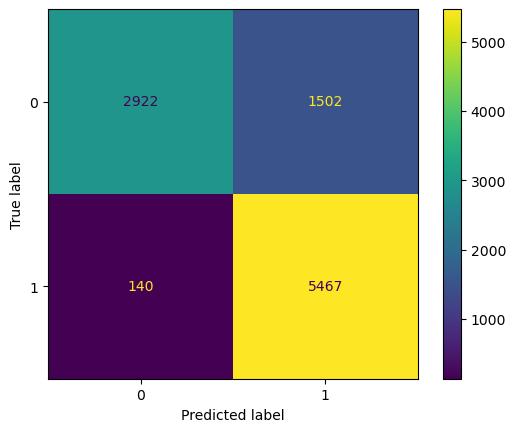

In [76]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print('--- Logistic Regression ---')
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# KNN model

--- K-Nearest Neighbors ---
Accuracy: 0.6408134782175257
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.57      4424
           1       0.66      0.72      0.69      5607

    accuracy                           0.64     10031
   macro avg       0.63      0.63      0.63     10031
weighted avg       0.64      0.64      0.64     10031

Confusion Matrix:
 [[2366 2058]
 [1545 4062]]


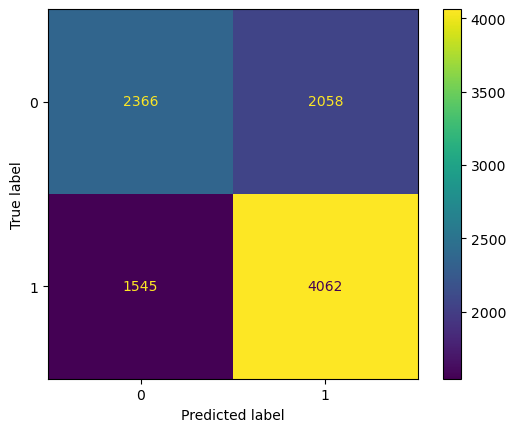

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print('--- K-Nearest Neighbors ---')
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# grid search for KNN

--- K-Nearest Neighbors (Grid Search) ---
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.6531751570132589
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.58      4424
           1       0.67      0.75      0.71      5607

    accuracy                           0.65     10031
   macro avg       0.65      0.64      0.64     10031
weighted avg       0.65      0.65      0.65     10031

Confusion Matrix:
 [[2363 2061]
 [1418 4189]]


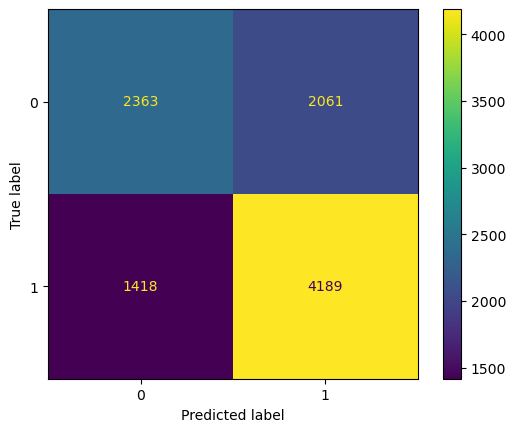

In [78]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
print('--- K-Nearest Neighbors (Grid Search) ---')
print("Best Parameters:", grid_knn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# DecisionTreeClassifier

--- Decision Tree ---
Accuracy: 0.8358089921244143
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      4424
           1       0.86      0.85      0.85      5607

    accuracy                           0.84     10031
   macro avg       0.83      0.83      0.83     10031
weighted avg       0.84      0.84      0.84     10031

Confusion Matrix:
 [[3642  782]
 [ 865 4742]]


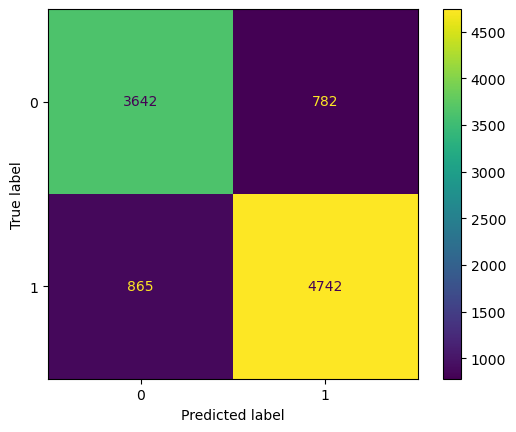

In [79]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('--- Decision Tree ---')
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# grid search for DecisionTree Classifier

--- Decision Tree (Grid Search) ---
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.8894427275446117
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      4424
           1       0.87      0.95      0.91      5607

    accuracy                           0.89     10031
   macro avg       0.90      0.88      0.89     10031
weighted avg       0.89      0.89      0.89     10031

Confusion Matrix:
 [[3618  806]
 [ 303 5304]]


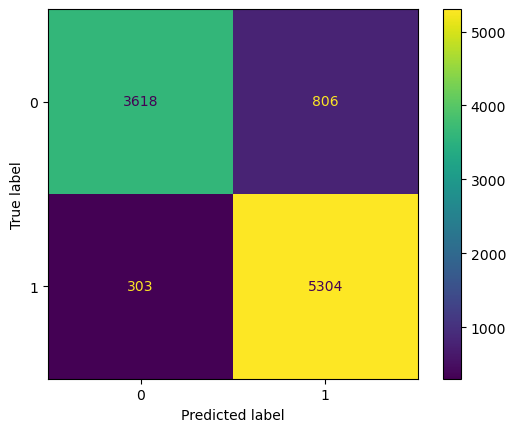

In [80]:
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test)
print('--- Decision Tree (Grid Search) ---')
print("Best Parameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# RandomForest Classifier

--- Random Forest ---
Accuracy: 0.8926328382015751
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4424
           1       0.87      0.94      0.91      5607

    accuracy                           0.89     10031
   macro avg       0.90      0.89      0.89     10031
weighted avg       0.89      0.89      0.89     10031

Confusion Matrix:
 [[3658  766]
 [ 311 5296]]


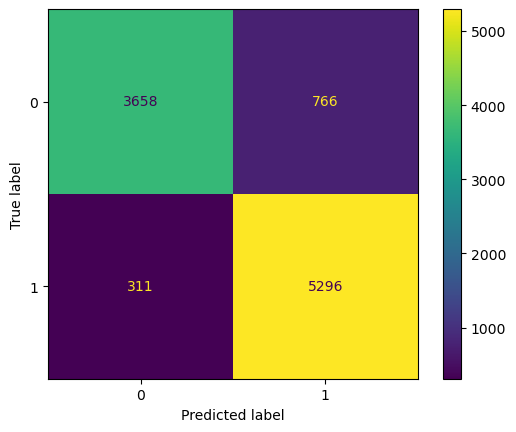

In [81]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('--- Random Forest ---')
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Artificial Neural Network MLP Classifier

--- Artificial Neural Network ---
Accuracy: 0.7423985644502044
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75      4424
           1       0.86      0.65      0.74      5607

    accuracy                           0.74     10031
   macro avg       0.76      0.75      0.74     10031
weighted avg       0.77      0.74      0.74     10031

Confusion Matrix:
 [[3808  616]
 [1968 3639]]


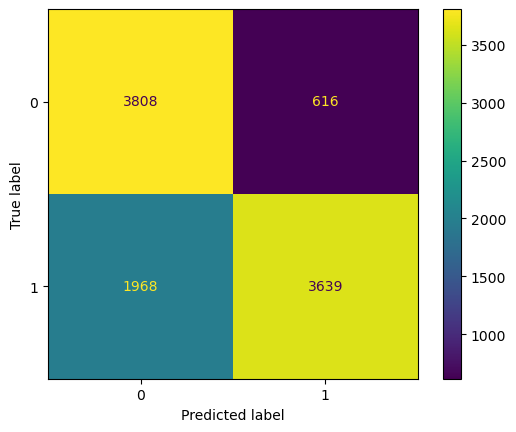

In [82]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print('--- Artificial Neural Network ---')
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Gradient Boosting

--- Gradient Boosting ---
Accuracy: 0.8923337653274848
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4424
           1       0.87      0.94      0.91      5607

    accuracy                           0.89     10031
   macro avg       0.90      0.89      0.89     10031
weighted avg       0.89      0.89      0.89     10031

Confusion Matrix:
 [[3667  757]
 [ 323 5284]]


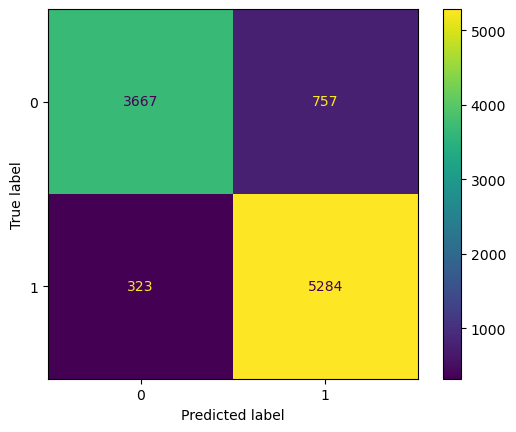

In [83]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('--- Gradient Boosting ---')
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Gradient Boosting

Gradient Boosting is a machine learning algorithm used for classification and regression tasks. It is based on the concept of ensemble learning, where multiple weak models (usually decision trees) are combined to create a stronger and more accurate model.

## How it Works:

### Boosting Principle:
- Models are built sequentially, and each new model corrects the errors of the previous one.
- It focuses more on the samples that were misclassified in previous iterations, making the subsequent model better.

### Gradient Descent Optimization:
- Instead of fitting data directly, Gradient Boosting minimizes a loss function by optimizing residual errors using gradient descent.
- It improves performance step-by-step by reducing errors at each stage.

## Steps in Gradient Boosting:
1. **Initialize the model** with a simple prediction (e.g., the mean value for regression or the majority class for classification).
2. **Calculate residuals** (errors) between predictions and actual values.
3. **Fit a weak learner** (e.g., a small decision tree) to predict these residuals.
4. **Update the model** by combining the weak learner predictions with a small learning rate.
5. Repeat this process until a stopping criterion (like the number of iterations) is reached.

## Advantages:
- Handles missing values well.
- Effective for both classification and regression tasks.
- Reduces bias and variance, leading to high accuracy.
- Works well with numerical and categorical data.

## Disadvantages:
- Can be computationally expensive and slower on large datasets.
- Requires careful tuning of hyperparameters, such as learning rate, number of estimators, and maximum depth of trees.
- Prone to overfitting if not tuned properly.
___________
___________
__________
_______

# Recommendation Systems ( 2 types ) 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aa561\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
comments = pd.read_csv('Comments.csv', usecols=['course_id', 'rate', 'display_name', 'comment'])
course_info = pd.read_csv('Course_info.csv', usecols=['id', 'title', 'category', 'price', 'num_subscribers', 'avg_rating'])
 
categories_to_keep = ['Development', 'IT & Software', 'Business']
filtered_courses = course_info[course_info['category'].isin(categories_to_keep)]
 
merged_data = pd.merge(comments, filtered_courses, left_on='course_id', right_on='id', how='inner')

In [29]:
merged_data = merged_data[['display_name', 'course_id', 'rate', 'title', 'comment', 'price']]

# Filter users with >5 ratings and courses with >10 ratings
user_counts = merged_data['display_name'].value_counts()
filtered_users = user_counts[user_counts > 5].index
merged_data = merged_data[merged_data['display_name'].isin(filtered_users)]

course_counts = merged_data['course_id'].value_counts()
filtered_courses = course_counts[course_counts > 10].index
merged_data = merged_data[merged_data['course_id'].isin(filtered_courses)]

In [30]:
merged_data.columns

Index(['display_name', 'course_id', 'rate', 'title', 'comment', 'price'], dtype='object')

In [31]:
print(f"Number of unique courses after filtering: {merged_data['course_id'].nunique()}")
num_rows = merged_data.shape[0]
print("Number of rows:", num_rows)
merged_data.sample(n=5)

Number of unique courses after filtering: 31113
Number of rows: 4017415


,display_name,course_id,rate,title,comment,price
4709413,Sachin,1405632,5.0,SQL - MySQL for Data Analytics and Business In...,The course was well structured and taught me a...,189.99
471351,Ayoub,2657368,5.0,The Complete Supervised Machine Learning Model...,Super Amazing Course!,109.99
362901,Amit,1996512,4.0,Tableau For Non-Technical Backgrounds - A Begi...,he said see you on next session & there are no...,24.99
2851743,Victor,4287514,4.5,Jira for Beginners - Detailed Course to Get St...,"Its picking up the pace with a lot of data, wo...",99.99
939093,Pablo,2674812,4.0,Aprende Unit Test en Java con Junit 5 y Mockito,"Bien explicado, aunque falto, realizar con el...",19.99


In [32]:
from numpy import log1p
course_rates = merged_data.groupby('course_id')['rate'].mean().reset_index()
course_rates.rename(columns={'rate': 'mean_rate'}, inplace=True)
top_courses = pd.merge(course_info, course_rates, left_on='id', right_on='course_id', how='inner')

In [33]:
numerical_columns = top_courses.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['id', 'price', 'num_subscribers', 'avg_rating', 'course_id',
       'mean_rate'],
      dtype='object')

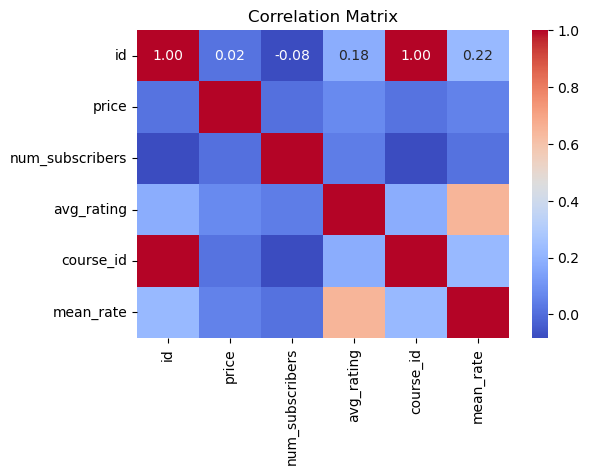

                       id     price  num_subscribers  avg_rating  course_id  \
id               1.000000  0.017535        -0.082587    0.183500   1.000000   
price            0.017535  1.000000         0.010094    0.075358   0.017535   
num_subscribers -0.082587  0.010094         1.000000    0.044061  -0.082587   
avg_rating       0.183500  0.075358         0.044061    1.000000   0.183500   
course_id        1.000000  0.017535        -0.082587    0.183500   1.000000   
mean_rate        0.223114  0.055913         0.010900    0.646828   0.223114   

                 mean_rate  
id                0.223114  
price             0.055913  
num_subscribers   0.010900  
avg_rating        0.646828  
course_id         0.223114  
mean_rate         1.000000  


In [34]:
numerical_data = top_courses[numerical_columns]
 
corr_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)

# Feature Engineering

In [11]:
top_courses['weighted_score'] = (
    0.5 * top_courses['avg_rating'] + 
    0.2 * log1p(top_courses['num_subscribers']) + 
    0.3 * top_courses['mean_rate']
)
 
top_1000_courses = top_courses.sort_values(by='weighted_score', ascending=False).head(1000)
 
filtered_data = merged_data[merged_data['course_id'].isin(top_1000_courses['course_id'])]
 
filtered_data = filtered_data[['display_name', 'course_id', 'rate']]
 

In [12]:
# Create User-Item matrix for top 1000 courses
user_item_matrix = filtered_data.pivot_table(index='display_name', columns='course_id', values='rate').fillna(0)

# Convert to sparse matrix
sparse_matrix = csr_matrix(user_item_matrix)

print("Shape of User-Item Matrix:", user_item_matrix.shape)


Shape of User-Item Matrix: (71349, 1000)


In [13]:
# Reduce dimensionality using SVD
svd = TruncatedSVD(n_components=50)
reduced_matrix = svd.fit_transform(sparse_matrix)

# Cosine silmileraity to get the nearset users in their behaviours

In [14]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(reduced_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [15]:
user_similarity_df.head()

display_name,Jason,"""Mohammed Nour"" A.","""Tarun Naga Sai Teja'",(Simon and Rhain,* gwishin,-,--Nick/,.,..,...,...,이재혁,이재현,이지훈,조남석,조현우,지은,차정민,추하은,추호진,현수
display_name,,,,,,,,,,,,,,,,,,,,,
Jason,1.000000,-0.079231,0.058651,-0.005161,-0.018403,0.458323,0.007336,-0.002248,-0.012574,0.022951,...,-0.045451,0.365166,0.005579,-0.013120,0.004821,-0.113275,-0.00349,0.012171,-0.005322,-0.055000
"""Mohammed Nour"" A.",-0.079231,1.000000,0.450380,-0.020853,-0.005196,0.077901,0.026854,0.040909,0.135177,-0.093573,...,0.048346,0.022863,0.108634,-0.053558,-0.042921,0.782926,0.03995,0.113695,-0.025357,0.210035
"""Tarun Naga Sai Teja'",0.058651,0.450380,1.000000,-0.263004,0.010939,-0.038247,0.003749,0.079113,0.048149,0.024247,...,0.050938,0.030905,-0.120089,0.030319,0.033735,0.185269,0.04166,-0.023319,0.003138,0.251809
(Simon and Rhain,-0.005161,-0.020853,-0.263004,1.000000,0.061303,0.421736,-0.001133,-0.036558,-0.001109,-0.052470,...,0.112621,0.056845,0.368984,-0.020177,-0.024504,0.184234,-0.10288,-0.005844,-0.017952,0.102838
* gwishin,-0.018403,-0.005196,0.010939,0.061303,1.000000,0.021127,0.026250,0.227967,0.009806,-0.005758,...,0.389168,0.021096,0.054020,0.682122,0.681973,-0.034781,0.03647,0.055063,0.003417,-0.018603


# Collaborative filtering recommendation

This system will show the contents that users with similer intersets have watched

In [16]:
def recommend_for_user(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return pd.DataFrame({"Error": ["User not found."]})  
     
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:num_recommendations+1].index
    recommendations = merged_data[merged_data['display_name'].isin(similar_users)]
    top_courses = recommendations.groupby('course_id')['rate'].mean().sort_values(ascending=False).head(num_recommendations)
    
    result = pd.merge(top_courses, course_info, left_index=True, right_on='id')[['title', 'avg_rating', 'num_subscribers']]
    
    return result

recommendations = recommend_for_user('Jason', 5)
print(recommendations)


                                                   title  avg_rating  \
37041  SQL Bootcamp with MySQL, PHP & Python : 5 Cour...    4.238637   
46825                        The Business Writing Course    4.550000   
46757  [NEW] Amazon EKS Starter: Docker on AWS EKS wi...    4.572034   
46712    A Gentle Introduction To ASP.NET  For Beginners    4.464912   
46593         Ms Project ile Proje Yönetimi ve Örnekleri    4.700000   

       num_subscribers  
37041         273132.0  
46825            576.0  
46757          28508.0  
46712           5331.0  
46593            790.0  


# CONTENT-BASED FILTERING

In [17]:
#here i gather all commments into one string gather by Course ID
course_comments = merged_data.groupby('course_id')['comment'].apply(lambda x: ' '.join(str(c) for c in x))

N = 10000  #for memory
top_courses = course_comments.sample(n=N, random_state=42)  

print(top_courses.head())

course_id
78938      This tutorial covers all the basics of creatin...
2863322    Really heplful to enhance basic skills of web ...
827692     I like this course a lot. It is very concise, ...
3897944    I have worked through several of Ben's courses...
1333204    i like this course i watched previews course o...
Name: comment, dtype: object


# Matrix Term Frequency and Inverse Document Frequency

In [18]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(top_courses)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

content_similarity = cosine_similarity(tfidf_matrix) 
content_similarity_df = pd.DataFrame(
    content_similarity, index=top_courses.index, columns=top_courses.index
)


In [20]:
def recommend_similar_courses(course_id, num_recommendations=5):
    if course_id not in content_similarity_df.index:
        return "Course not found. Try with a sampled course ID."
    similar_courses = (
        content_similarity_df[course_id]
        .sort_values(ascending=False)
        .iloc[1:num_recommendations + 1]
        .index
    )
    return course_info[course_info['id'].isin(similar_courses)][['title', 'avg_rating', 'num_subscribers']]

# Example Usage:
print("Content-Based Recommendations:")
example_course_id = top_courses.index[0]   #first COURSE
print(recommend_similar_courses(example_course_id))


Content-Based Recommendations:
                                                   title  avg_rating  \
4350   The Complete Android Oreo and Nougat App Tutor...    3.950000   
18979  The Complete Android S + Java Developer Course...    4.286667   
33421  The Complete Android Oreo Developer Course - B...    4.384615   
53859  Complete Android Jetpack Bootcamp(With Jetpack...    4.608466   
68897              Android Jetpack masterclass in Kotlin    4.791666   

       num_subscribers  
4350           20369.0  
18979          33683.0  
33421          87517.0  
53859          11229.0  
68897           4548.0  


# Sentiment Analysis

In [21]:
# Apply sentiment analysis to each comment
merged_data['sentiment_scores'] = merged_data['comment'].apply(lambda x: sia.polarity_scores(str(x)))

# Split sentiment scores into separate columns
sentiment_df = pd.json_normalize(merged_data['sentiment_scores'])
merged_data = pd.concat([merged_data, sentiment_df], axis=1)
 
merged_data.drop(columns=['sentiment_scores'], inplace=True)

print(merged_data.head())  

    display_name  course_id  rate                                     title  \
986        Pavel  4840590.0   1.0  AWS Certified Machine Learning Specialty   
989           AR  4840590.0   5.0  AWS Certified Machine Learning Specialty   
992          Mia  4840590.0   5.0  AWS Certified Machine Learning Specialty   
993       Ariyan  4840590.0   5.0  AWS Certified Machine Learning Specialty   
994        Milan  4840590.0   5.0  AWS Certified Machine Learning Specialty   

                                               comment  price    neg    neu  \
986  Total garbage or purposeful disinformation, ma...  19.99  0.000  0.406   
989                    This course was really amazing.  19.99  0.000  0.758   
992                                  Perfect training.  19.99  0.000  0.503   
993  Great site, service on this site, you are very...  19.99  0.000  0.644   
994  I feel awesome by this test. I'm totally satis...  19.99  0.051  0.478   

       pos  compound  
986  0.594    0.8685  
989 

In [22]:
course_sentiments = merged_data.groupby('course_id')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()
course_info_with_sentiments = pd.merge(course_info, course_sentiments, left_on='id', right_on='course_id', how='inner')

print(course_info_with_sentiments.head())  


       id                                              title   price  \
0  1769.0         The Lean Startup Talk at Stanford E-Corner    0.00   
1  8082.0                     Ruby Programming for Beginners   74.99   
2  8075.0  How to Create an Awesome Demo Video for Your B...  149.99   
3  8420.0  CCNP ROUTE 300-101 Video Boot Camp With Chris ...   19.99   
4  8324.0                           Javascript for Beginners   19.99   

   num_subscribers  avg_rating       category  course_id       neg       neu  \
0          26474.0    4.500000       Business     1769.0  0.016700  0.798089   
1          28824.0    4.000000    Development     8082.0  0.015641  0.717832   
2          10761.0    3.900000       Business     8075.0  0.010011  0.625391   
3           4454.0    4.350000  IT & Software     8420.0  0.017270  0.621730   
4           9714.0    4.408389    Development     8324.0  0.028013  0.925881   

        pos  compound  
0  0.185211  0.234711  
1  0.266515  0.295355  
2  0.364598  0

In [23]:
top_positive_courses = course_info_with_sentiments.sort_values(by='pos', ascending=False).head(5)
print("Top Positive Courses:")
print(top_positive_courses[['title', 'pos', 'avg_rating', 'num_subscribers']])
 
top_negative_courses = course_info_with_sentiments.sort_values(by='neg', ascending=False).head(5)
print("Top Negative Courses:")
print(top_negative_courses[['title', 'neg', 'avg_rating', 'num_subscribers']])


Top Positive Courses:
                                                   title       pos  \
9045                Satış Yönetimi (pipeline management)  0.753909   
18098     【AIのビジネス活用をお考えの方向け】人工知能を利用したビジネス活用・人材・スキルを学ぶ講座  0.741143   
21828  Mastering ISO/IEC 17025: 2017 and Certified In...  0.714583   
25868  Learn How To Build Amazing Websites w/ HTML, C...  0.712450   
23050  The Complete Java Game Development Course for ...  0.702636   

       avg_rating  num_subscribers  
9045     4.150000            249.0  
18098    3.950000           1624.0  
21828    4.350000            243.0  
25868    4.525000         102965.0  
23050    4.341464          98870.0  
Top Negative Courses:
                                                   title       neg  \
28209                 Python 3 - разработка GUI на PyQt5  0.486500   
22419                         Türkçe JavaScript Bootcamp  0.311579   
25472                                Markdown Essentials  0.273786   
16944  Setup Own VPN Server with 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


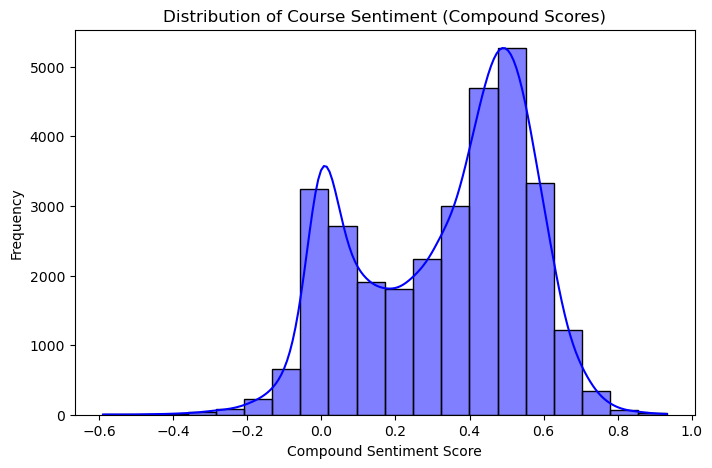

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(course_sentiments['compound'], kde=True, bins=20, color='blue')
plt.title('Distribution of Course Sentiment (Compound Scores)')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()